In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
train_df = pd.read_csv("./data/all_review.csv", encoding="utf-8-sig")
train_df.head()

,리뷰일,앱이름,별점,사용자 리뷰,회사 응답
0,2025-12-25,공모주일정,5.0,요 앱이 얼마나 유용한지는 써보고 실제 활용해 보면 알게 됩니다. 설치한지 1년이 ...,회사 응답 없음
1,2025-12-21,공모주일정,5.0,설치해서 사용하다보니 이 앱이야 말로 제 인생에서 가장 필요한 앱이었다는걸 알게 되...,회사 응답 없음
2,2025-12-21,공모주일정,1.0,광고가 너무길다,회사 응답 없음
3,2025-12-16,공모주일정,4.0,이거 유료버전은 없나요?,회사 응답 없음
4,2025-12-05,공모주일정,5.0,돈버는앱,회사 응답 없음


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   리뷰일     450 non-null    object 
 1   앱이름     450 non-null    object 
 2   별점      450 non-null    float64
 3   사용자 리뷰  450 non-null    object 
 4   회사 응답   450 non-null    object 
dtypes: float64(1), object(4)
memory usage: 17.7+ KB


In [4]:
train_df = train_df.drop('회사 응답', axis=1)

In [5]:
train_df['별점'].value_counts()

별점
5.0    315
1.0     62
4.0     30
3.0     29
2.0     14
Name: count, dtype: int64

<Axes: xlabel='별점'>

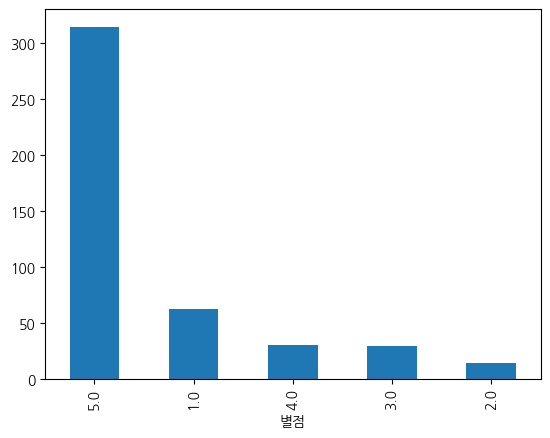

In [6]:
train_df['별점'].value_counts().plot(kind='bar')

In [7]:
train_df.loc[train_df['별점'] == 4, '사용자 리뷰'].head(20)

3                                          이거 유료버전은 없나요?
6                                     갑자기 버그 발생으로 튕겨나오에요
86     너무 잘 사용하고 있습니다. 개발에 감사드립니다. 다만 어떤 광고는 x나 넘어가는 ...
103    잘쓰다가 갑자기 어플이 안열립니다. 재설치해도 똑같이 다시시도 표시만나옵니다. 해결...
106                                          앱이보기편하고 좋네요
114                              균등 최종 결과도 표시 되었으면 좋겠습니다
133          계속 잘 썼다가 지금 현재 앱이 들어가지지 않습니다. 무슨 문제가 있는건가요?
176    여러 공모 정보와 스케줄이 보기 편하게 정리 되어 있어서 유용하게.잘 사용하고 있습...
181                          최대청약수량이랑 금액도 표기해주시면 좋을거 같아요
183           실권주가 없어졌네요 아쉽습니다 그리고 일정이 변경되면 즉각반영됐으면 좋겠어요
189                       오늘 어플 접속해보니 하루종일 인터넷연결안됨으로 됩니다
190                   자꾸 인터넷 연결이 안됐다고 뜨네요. 이전까지는 안그랬는데..
204    최근 핸드폰을 바꿨는데 로그인이 계속 안되네요. 네이버와 카카오 계정 로그인만 나오...
221    핸드폰교체후 기존 계정으로 로그인이 되질않네요. 계속 돌아가기만하고 가입하라해서 하...
222      잘사용하고 있습니다! 최소청약금액이 표시된다면 보고 바로입금할수있어서 편리할것같습니다
232    좋아요. 근데 왜 카톡 알림은 오다 안오다 하나요? 오늘 날짜 기준 4월 8일 이후...
234    유용할 것 같아 설치를 하고 배정 계산하기를 눌러 금액을 작성하였는데 내용이 안보여...
286               갤린더에 청약 일정 첫날

In [8]:
train_df.loc[train_df['별점'] == 3, '사용자 리뷰'].head(20)

8                     광고가 너무 길어요. 광고 안 나오는 유료앱도 있으면 좋겠어요
47                                편리하기는 하나 광고가 길어서 패쓰ㅡ삭제
49     알람만 믿고서 일정변경 알람이 업데이트 되지 않아 놓쳤네요... 변졍된 일정 알람 ...
83            간만에오니 광고영상 생긴게 너무불편하네요. 유료제거도 좋으니 고려좀해주세요.
99     아버지가 s22+ 휴대폰으로 사용중인데 어느순간부터 스크롤만 내리면 튕기는 증상이 ...
105    1. 인터넷 브라우저에서 클릭해도 열리지 않음. 2. 앱 제거 후 재다운로드 해도 ...
129    한가지문의드릴게있는데 공모러앱에서는 내가받게될 배정주식수(균등/비례)는 제공안하는건...
132                          평소에 잘 사용하다가 지금 접속이 아예 안되네요?
134                                             앱이 안열려요ㅜ
147    왜 업뎃이 아닌 다운그레이가 됬는지? 기존. 매도가와 수수료 입력시 수수료 포함한 ...
207    잘 쓰고 있었는데 얼마전부터 리포트가 무한로딩입니다. 리포트 모아줘서 보기 편했는데...
225    업데이트 하시겠습니까? 팝업이 뜨는데... 누르면 업데이트가 안되고, 계속 구글스토...
226    배정수량 넣었는데 왜 평가 금액이 0원인가여??? 몇일전부터 그러는데 예) 공모가가...
241                설치를 몇번 다시해도 계속해서 업데이트하라고 뜨네요. 확인바랍니다.
247                 처음인데 잘사용해볼께요 상장일 유통가능금액 표시해주면좋은것같습니다
302    어플 자체는 도움이 많이 되는데, 너무 자주 팅기고 로그인도 맨날 풀려서 들어갈 때...
303           일반종목은 투자노트쓰기 버튼이 있던데 스팩종목은 투자노트쓰기 버튼이 없나요?
306    이앱 처음 사용할려고 신청했는데 무지 복잡하

In [9]:
train_df['긍정'] = train_df['별점'].apply(lambda x: 1 if x >= 4 else 0)
train_df

,리뷰일,앱이름,별점,사용자 리뷰,긍정
0,2025-12-25,공모주일정,5.0,요 앱이 얼마나 유용한지는 써보고 실제 활용해 보면 알게 됩니다. 설치한지 1년이 ...,1
1,2025-12-21,공모주일정,5.0,설치해서 사용하다보니 이 앱이야 말로 제 인생에서 가장 필요한 앱이었다는걸 알게 되...,1
2,2025-12-21,공모주일정,1.0,광고가 너무길다,0
3,2025-12-16,공모주일정,4.0,이거 유료버전은 없나요?,1
4,2025-12-05,공모주일정,5.0,돈버는앱,1
...,...,...,...,...,...
445,2024-07-26,공모주알리미,5.0,이 앱 덕분에 공모주 청약 정보와 기업 정보를 쉽게 얻을 수 있었어요. 실시간 업데...,1
446,2024-07-25,공모주알리미,5.0,공모주 청약 정보를 손쉽게 확인할 수 있는 이 앱 덕분에 투자 관리가 편해졌어요. ...,1
447,2024-07-25,공모주알리미,5.0,공모주 청약 앱을 사용해보니 정말 편리합니다. 실시간으로 다가오는 청약일을 확인할 ...,1
448,2022-12-02,공모주알리미,5.0,주변에도 추천 해주었네요 관련 어플중에선 이게가장 볼게 많고 정확 합니다,1


공모주어플

In [10]:
train_df['앱이름'].value_counts()

앱이름
일육공       115
공모주일정     100
공모러       100
피너츠       100
공모주알리미     35
Name: count, dtype: int64

In [11]:
train_df['앱이름'].unique()

array(['공모주일정', '공모러', '피너츠', '일육공', '공모주알리미'], dtype=object)

# 딕셔너리로 긍정부정 데이터프레임 나누어 저장하기


In [12]:
ipo_list_dict = dict(zip(train_df['앱이름'].unique(), ['공모주일정', '공모러','피너츠','일육공','공모주알리미']))
ipo_list_dict

{'공모주일정': '공모주일정',
 '공모러': '공모러',
 '피너츠': '피너츠',
 '일육공': '일육공',
 '공모주알리미': '공모주알리미'}

은행별 긍정 부정 df 필터링

In [13]:
train_df[(train_df['앱이름'] == '공모주일정') & (train_df['긍정'] == 1)]

,리뷰일,앱이름,별점,사용자 리뷰,긍정
0,2025-12-25,공모주일정,5.0,요 앱이 얼마나 유용한지는 써보고 실제 활용해 보면 알게 됩니다. 설치한지 1년이 ...,1
1,2025-12-21,공모주일정,5.0,설치해서 사용하다보니 이 앱이야 말로 제 인생에서 가장 필요한 앱이었다는걸 알게 되...,1
3,2025-12-16,공모주일정,4.0,이거 유료버전은 없나요?,1
4,2025-12-05,공모주일정,5.0,돈버는앱,1
5,2025-11-18,공모주일정,5.0,앱이 무슨 버그가 있다면서 자꾸 꺼져요,1
...,...,...,...,...,...
89,2023-12-02,공모주일정,5.0,오랫동안 쓰던 폰을 새거로 바꾸고 새로 설치했는데 와우 제가 원했던 기능들이 추가 ...,1
91,2023-10-23,공모주일정,5.0,달력으로 필요한 공모일정만 간단히 보고 싶은데 불편함. ---------------...,1
94,2023-09-19,공모주일정,5.0,이번주 공모주가 엄청 많네요. 잘 참고하도록 하겠습니다. 쌩유~,1
96,2023-09-11,공모주일정,5.0,나같은 사람에겐 빛같은 어플이에욥!,1


In [14]:
train_df[(train_df['앱이름'] == '공모주일정') & (train_df['긍정'] == 0)].shape[0]

16

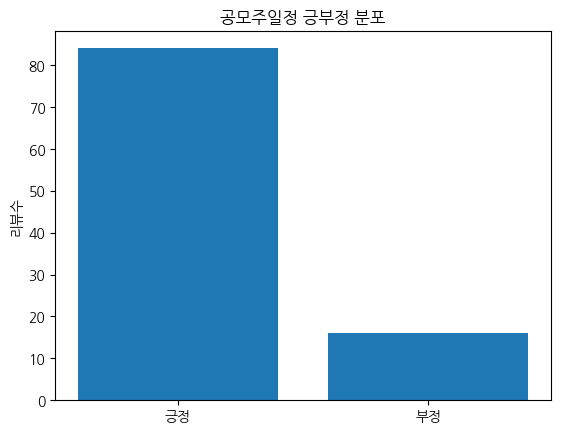

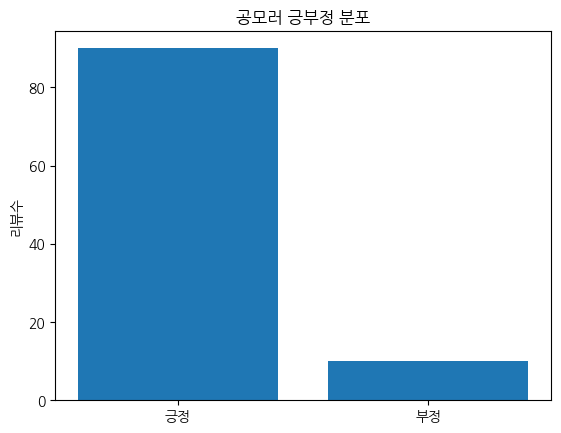

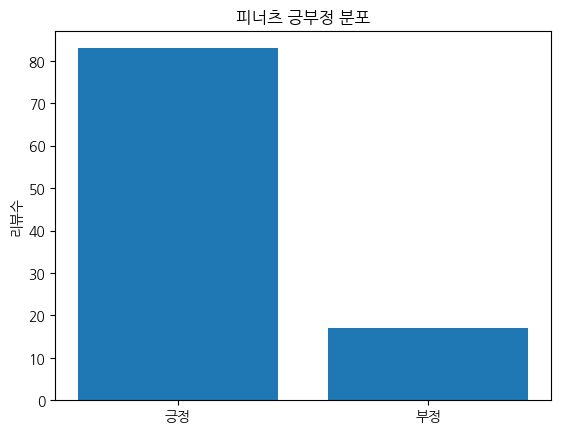

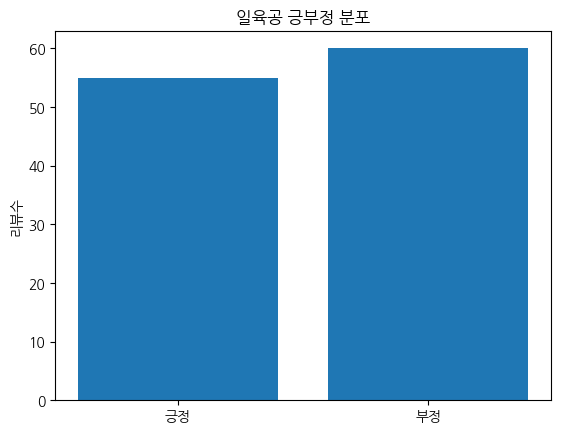

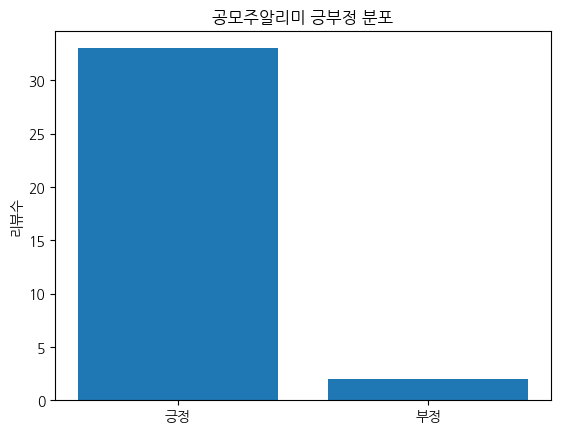

{'공모주일정': {'pos':            리뷰일    앱이름   별점                                             사용자 리뷰  \
  0   2025-12-25  공모주일정  5.0  요 앱이 얼마나 유용한지는 써보고 실제 활용해 보면 알게 됩니다. 설치한지 1년이 ...   
  1   2025-12-21  공모주일정  5.0  설치해서 사용하다보니 이 앱이야 말로 제 인생에서 가장 필요한 앱이었다는걸 알게 되...   
  3   2025-12-16  공모주일정  4.0                                      이거 유료버전은 없나요?   
  4   2025-12-05  공모주일정  5.0                                               돈버는앱   
  5   2025-11-18  공모주일정  5.0                              앱이 무슨 버그가 있다면서 자꾸 꺼져요   
  ..         ...    ...  ...                                                ...   
  89  2023-12-02  공모주일정  5.0  오랫동안 쓰던 폰을 새거로 바꾸고 새로 설치했는데 와우 제가 원했던 기능들이 추가 ...   
  91  2023-10-23  공모주일정  5.0  달력으로 필요한 공모일정만 간단히 보고 싶은데 불편함. ---------------...   
  94  2023-09-19  공모주일정  5.0                이번주 공모주가 엄청 많네요. 잘 참고하도록 하겠습니다. 쌩유~   
  96  2023-09-11  공모주일정  5.0                                나같은 사람에겐 빛같은 어플이에욥!   
  98  2023-03-09  공모주일정  5.0  잘쓰고 있습니다. 감사합니다. 넘버원님의 블로그 주소가 2023년부터 바뀌

In [17]:
pos_neg_dict = {}
for ipo, ipo_eng in ipo_list_dict.items():
#     print(bank, ipo_eng)
    pos = train_df[(train_df['앱이름'] == ipo) & (train_df['긍정'] == 1)]
    neg = train_df[(train_df['앱이름'] == ipo) & (train_df['긍정'] == 0)]
    pos_neg_dict[ipo_eng] = dict(pos=pos, neg=neg)
    
    # 은행별 긍정/부정리뷰 비율 시각화
    plt.bar(['긍정', '부정'], [pos.shape[0], neg.shape[0]])
    plt.title(f"{ipo} 긍부정 분포")
    plt.ylabel("리뷰수")
    plt.show()
    
    
pos_neg_dict

모든 데이터 프레임에서 특수문자 제거하기

In [18]:
import re

In [19]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [20]:
for ipo_eng, pn in pos_neg_dict.items():
    for key in ['pos', 'neg']:
        df = pn[key]
        df.loc[:, '사용자 리뷰'] = df['사용자 리뷰'].apply(text_clean)
        pos_neg_dict[ipo_eng][key] = df

In [21]:
pos_neg_dict['공모주일정']['neg']

,리뷰일,앱이름,별점,사용자 리뷰,긍정
2,2025-12-21,공모주일정,1.0,광고가 너무길다,0
8,2025-09-11,공모주일정,3.0,광고가 너무 길어요 광고 안 나오는 유료앱도 있으면 좋겠어요,0
11,2025-08-13,공모주일정,1.0,광고땜에 사용불가,0
12,2025-07-03,공모주일정,1.0,광고 드럽게 많네 알림도 지멋대로 울림,0
17,2025-04-10,공모주일정,1.0,광고가 너무 깁니다,0
18,2025-04-03,공모주일정,1.0,광고 쩐다 알람도 안오고 어플 실행해야 알람 울림 글고 너무 조잡해요,0
25,2024-10-01,공모주일정,1.0,광고가 떠서 이젠 떠납니다,0
47,2024-07-17,공모주일정,3.0,편리하기는 하나 광고가 길어서 패쓰 삭제,0
49,2024-07-03,공모주일정,3.0,알람만 믿고서 일정변경 알람이 업데이트 되지 않아 놓쳤네요 변졍된 일정 알람 업데이...,0
83,2024-02-17,공모주일정,3.0,간만에오니 광고영상 생긴게 너무불편하네요 유료제거도 좋으니 고려좀해주세요,0


# 어플별 긍부정 리뷰 워드클라우드 만들기

In [22]:
# !pip install wordcloud

# 🌀 워드클라우드(WordCloud) 만들기 
한국어 리뷰 데이터 분석 + 시각화

---

## 1. 워드클라우드란?

- 텍스트 데이터에서 **단어의 등장 빈도수**를 기준으로  
  단어 크기·배치·색상을 다르게 표현하는 시각화 기법이다.
- 등장 빈도가 높을수록 크게, 낮을수록 작게 표시된다.
- 리뷰, 설문, 댓글, SNS 데이터의 **핵심 키워드 탐색**에 매우 효과적이다.

---

## 2. 라이브러리 설치

```bash
pip install wordcloud
```

# ⚠️ 한국어 워드클라우드(font_path 필수)  
한국어 워드클라우드를 만들 때는 반드시 **font_path** 옵션을 지정해야 한다.  
지정하지 않으면 한글이 깨지거나 네모(□)로 출력된다.

---

# 3. 작업 흐름 개요

1. **텍스트 데이터 준비**  
   - pandas Series → 리스트(list) → 하나의 긴 문자열로 합치기

2. **텍스트 정제(전처리)**  
   - 정규표현식으로 특수문자 제거  
   - 필요 시 소문자 변환, 공백 정리 등 추가 처리

3. **한국어 형태소 분석으로 명사 추출**  
   - MeCab, Okt, Komoran 등  
   - 워드클라우드는 명사 위주로 작성하는 것이 가장 효과적

4. **불용어(stopwords) 제거**  
   - ‘은행’, ‘앱’, ‘어플’ 같은 너무 일반적인 단어 제거  
   - 브랜드명(하나, 국민, 신한 등)도 필요 시 제거

5. **단어 빈도수 계산 (Counter)**  
   - Counter(filtered_words) 형태로 {단어: 등장 횟수} 사전(dictionary) 생성

6. **WordCloud 옵션 지정**  
   - font_path  
   - width / height  
   - background_color  
   - max_words, max_font_size 등  
   - 필요 시 colormap, mask 옵션 설정

7. **generate_from_frequencies()로 워드클라우드 생성**

8. **시각화 및 파일 저장**  
   - matplotlib으로 표시  
   - .png 파일로 저장 가능

---

# 4. 텍스트 데이터 준비 + 전처리

## 4.1 텍스트 합치기

리뷰가 Series 형태라면 다음과 같이 리스트로 변환 후 하나의 문자열로 합칠 수 있다.

```python
# 리뷰 Series → 리스트 → 하나의 문자열로 변환
text_data = df['사용자리뷰'].astype(str).tolist()
full_text = " ".join(text_data)
```
* .astype(str) : NaN/None 발생 시 안전하게 문자열 변환
* .tolist() : pandas Series → Python list
* " ".join(list) : 하나의 긴 문자열로 연결

## 4.2 텍스트 정제(전처리)

정규표현식을 사용해 한글/숫자/알파벳만 남기고 나머지를 제거한다.
```python
import re

def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, str(x))
    return " ".join(matches)

# 전처리 적용
df['사용자리뷰'] = df['사용자리뷰'].astype(str).apply(text_clean)

```
* [가-힣0-9a-zA-Z]+ : 한글 전체 + 숫자 + 영어만 추출
* 리뷰 문장에서 이모지, 특수문자, 기호 등을 제거해 깔끔한 텍스트 확보

## 5. 형태소 분석 + 불용어 제거

한국어 텍스트는 공백 기반 토큰화가 어렵기 때문에 **MeCab 등 형태소 분석기로 명사만 추출**하는 방식이 가장 효과적이다.

### 5.1 MeCab 명사 추출

```python
from konlpy.tag import Mecab
mecab = Mecab()
nouns = mecab.nouns(full_text)
```

---

### 5.2 불용어(stopwords) 정의

```python
stopwords = set([
    '은행', '어플', '뱅킹', '앱', '서비스', '고객',
    '하나', '국민', '신한', '우리',
    'toss', '카드'
])
```

---

### 5.3 불용어 제거 + 한 글자 단어 제거

```python
filtered = [
    word for word in nouns
    if len(word) > 1 and word not in stopwords
]
```

---

## 6. 단어 빈도 계산

```python
from collections import Counter
word_freq = Counter(filtered)
```

---

## 7. WordCloud 옵션 상세 설명

```python
from wordcloud import WordCloud

wc = WordCloud(
    font_path="NanumGothic.ttf",
    background_color="white",
    width=800, height=400,
    max_words=200,
    max_font_size=120,
    min_font_size=4,
    colormap="tab10",
    prefer_horizontal=0.9,
    scale=2,
    stopwords=None,
    mask=None,
    contour_width=0,
    contour_color='black'
)
```

| 옵션 | 의미 |
|------|------|
| font_path | 한글 폰트 경로 |
| background_color | 배경색 |
| width/height | 이미지 크기 |
| max_words | 최대 단어 수 |
| max_font_size | 글자 최대 크기 |
| min_font_size | 글자 최소 크기 |
| colormap | 색상 팔레트 |
| prefer_horizontal | 가로 배치 비율 |
| scale | 고해상도 렌더링 배율 |
| mask | 특정 모양 마스크 |
| contour_width/color | 외곽선 효과 |

---

## 8. generate() vs generate_from_frequencies()

### generate(text)

```python
wc.generate(full_text)
```

---

### generate_from_frequencies(freq_dict)

```python
wc.generate_from_frequencies(word_freq)
```

> 한국어 분석에서는 **generate_from_frequencies()** 방식이 훨씬 정확하다.



# 반복문으로 은행별 만족/불만족 워드클라우드 그리기

In [23]:
!pip install mecab-python3

In [24]:
from wordcloud import WordCloud

In [25]:
from konlpy.tag import Mecab
mecab = Mecab()

In [26]:
full_text = " ".join(pos_neg_dict['공모주일정']['pos']['사용자 리뷰'].tolist())

In [27]:
stopwords = set(['공모주', '공모', '어플', '앱', '공모주일정', '공모러','피너츠','일육공','공모주알리미', '서비스',
                 '감사', '최고', '사용'])

In [28]:
# full_text에서 명사만 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]
# filtered

단어의 빈도 계산 collections의 counter로 계산

In [29]:
from collections import Counter

In [30]:
word_freq = Counter(filtered)
word_freq

Counter({'일정': 15,
         '참여': 9,
         '설치': 8,
         '필요': 7,
         '알람': 7,
         '이번': 7,
         '달력': 7,
         '분위기': 6,
         '재미': 6,
         '기능': 6,
         '설정': 5,
         '참고': 5,
         '오늘': 5,
         '도움': 5,
         '정보': 5,
         '활용': 4,
         '이거': 4,
         '배정': 4,
         '얼마': 4,
         '상장': 4,
         '체크': 4,
         '유용': 4,
         '진행': 4,
         '사람': 4,
         '올해': 4,
         '관심': 4,
         '관련': 4,
         '후기': 4,
         '이후': 3,
         '청약': 3,
         '확인': 3,
         '주도': 3,
         '다음': 3,
         '기대': 3,
         '표시': 3,
         '대박': 3,
         '나중': 3,
         '오랫동안': 3,
         '계획': 3,
         '관리': 3,
         '투자': 3,
         '시작': 3,
         '결정': 3,
         '생각': 3,
         '제공': 3,
         '추가': 3,
         '기록': 3,
         '실제': 2,
         '인생': 2,
         '버그': 2,
         '취소': 2,
         '구분': 2,
         '주식': 2,
         '예전': 2,
         '아이콘': 2,
     

워드 클라우드 그리기

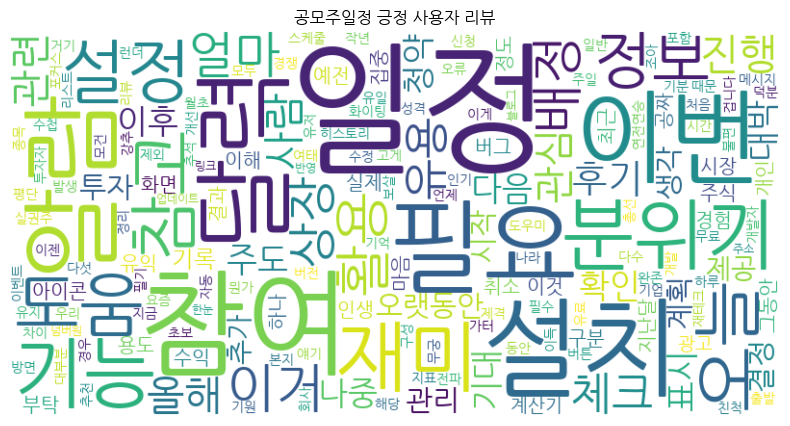

In [31]:
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("공모주일정 긍정 사용자 리뷰")
plt.show()

반복문으로 전체 데이터 워드클라우드 만들기

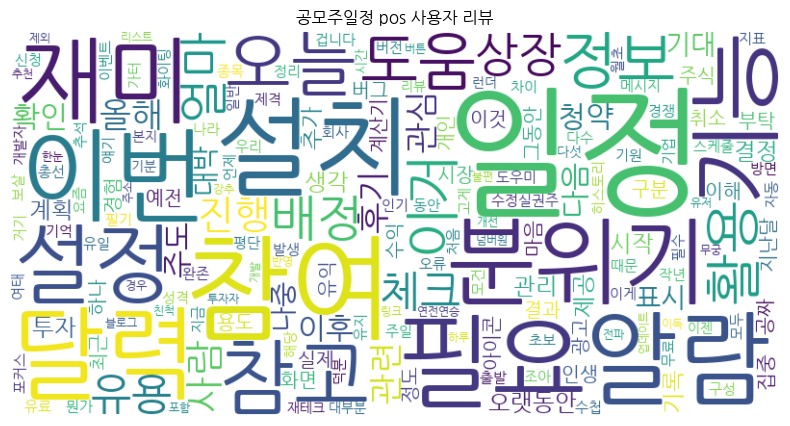

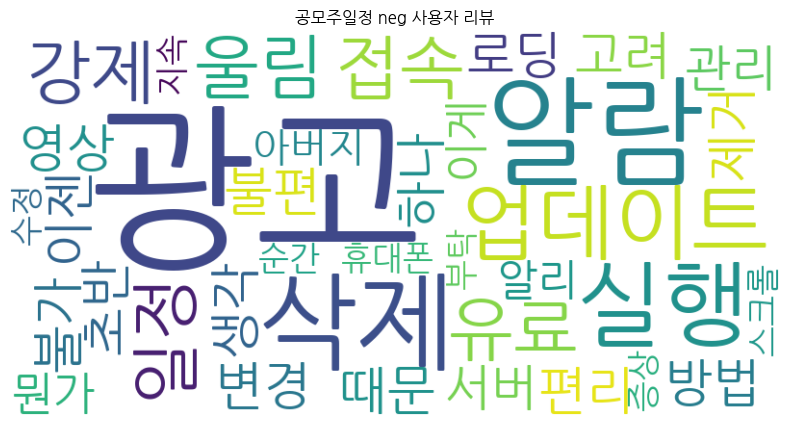

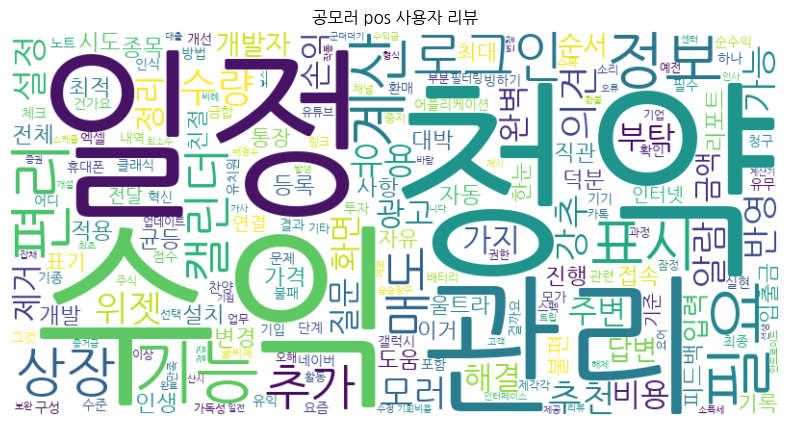

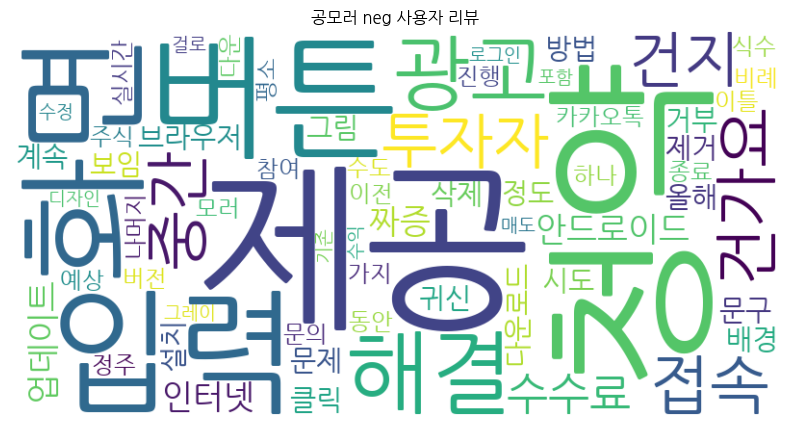

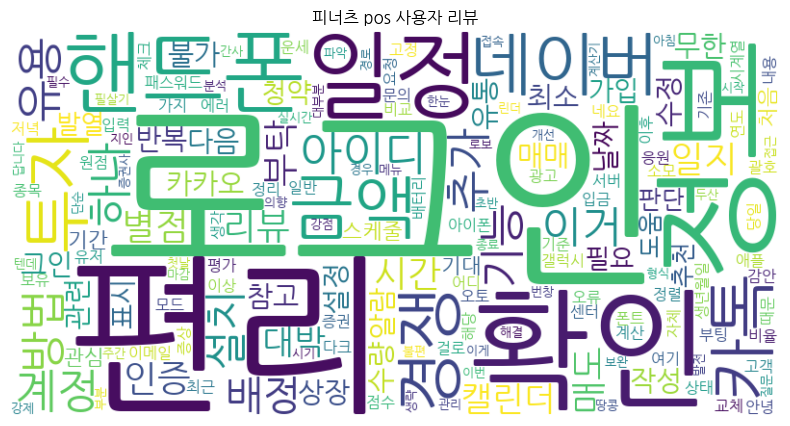

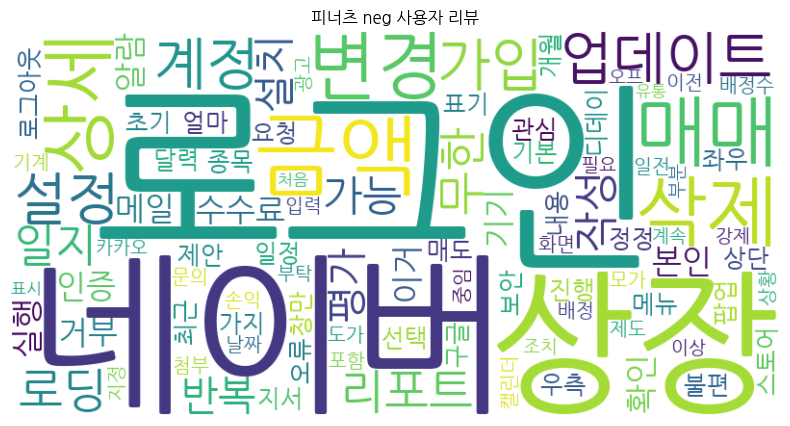

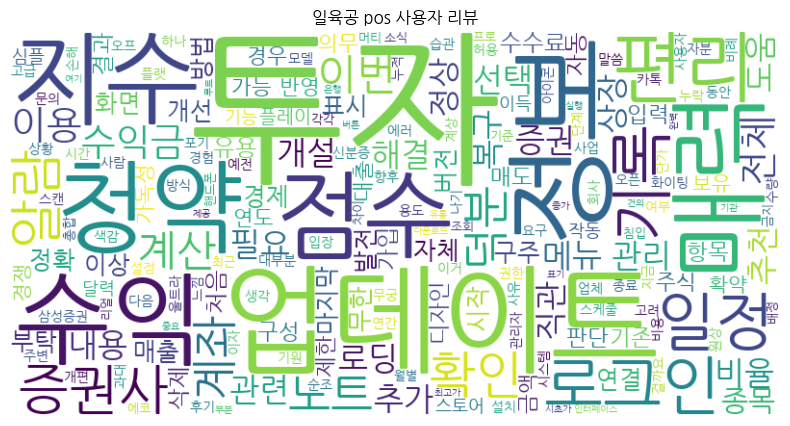

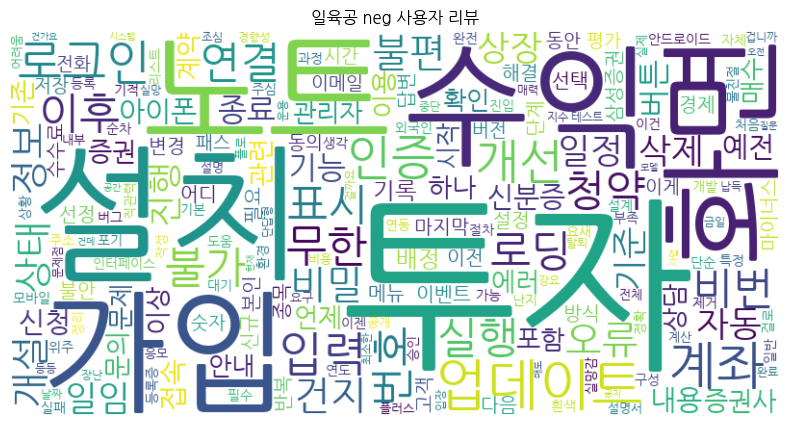

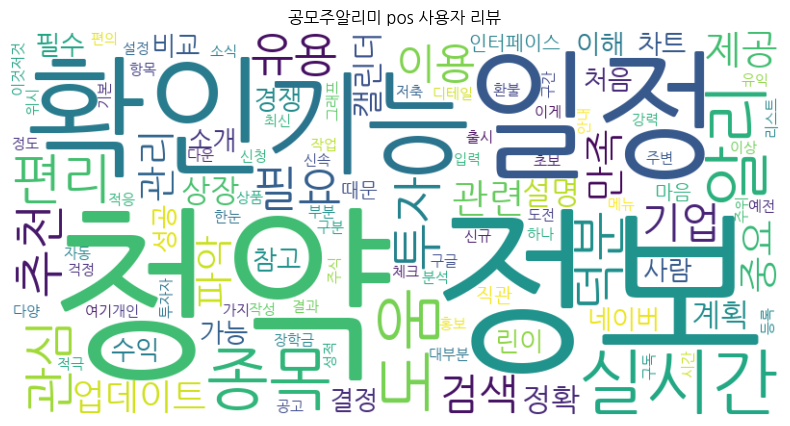

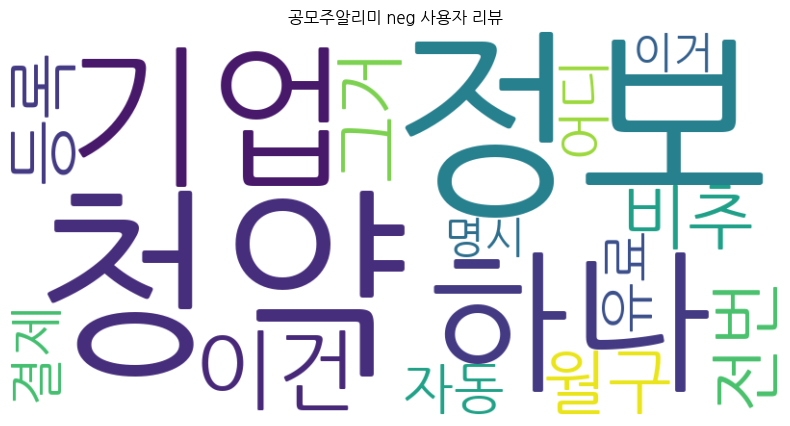

In [32]:
for ipo_eng, pn in pos_neg_dict.items():
    for label, df in pn.items():
#         print(ipo_eng, label)
#         display(df)
        full_text = " ".join(df['사용자 리뷰'].tolist())
        # full_text에서 명사만 추출 
        nouns = mecab.nouns(full_text)
        # stopword 제외 후 다시 합침
        filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]
        # 단어의 빈도 계산
        word_freq = Counter(filtered)
        
        # wordcloud 그리기
        wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
        plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{ipo_eng} {label} 사용자 리뷰")
        save_name = f"./data/{ipo_eng}_{label}_사용자 리뷰.png"
        plt.savefig(save_name, dpi=300, bbox_inches='tight')
        plt.show()

# 📘 LDA 기반 최적 토픽 추출 (토픽 모델링)
### ― 한국어 리뷰 + Mecab 형태소 분석 + gensim Coherence 기반 토픽 개수 최적화 ―
* LDA는 문서 집합에서 주제를 추출하는 토픽모델링 기법
* 각 문서(리뷰 1개)는 여러 주제들로 구성되어 있고, 각 주제는 특정 단어들의 분포로 표현된다는 베이지안 확률에 기반


## 1. 토픽 모델링(Topic Modeling)이란?

토픽 모델링은 **문서 집합 속에 숨어 있는 주제(Topic)들을 자동으로 발견하는 비지도 학습 기법**이다.   
텍스트 데이터(예: 상품 리뷰, 설문 답변, 고객 불만 글 등)에 라벨이 없어도, 텍스트 내부 패턴을 분석해 문서들이 어떤 주제들을 중심으로 구성되어 있는지 스스로 찾아낸다.

### ✔️ 토픽 모델링의 핵심 특징
- 지도학습이 아닌 **비지도 학습(Unsupervised)**  
- 단어들의 **동시 등장 패턴(co-occurrence)** 을 기반으로 주제를 추론  
- 하나의 문서는 **복수의 토픽으로 구성될 수 있음**  
- 각 토픽은 특정 단어가 높은 확률로 등장하는 **단어 확률 분포**로 표현됨



## 2. LDA(Latent Dirichlet Allocation)의 개념

LDA는 토픽 모델링을 위한 가장 대표적이고 고전적인 확률 기반 모델이다.  
문서가 “토픽들의 혼합물”이고, 각 토픽은 “단어들의 혼합물”이라는 가정 위에서 작동한다.

### ✔️ LDA의 기본 가정
1. **각 문서(doc)는 여러 토픽(topic)들의 확률적 혼합물이다.**  
   - 예: 30% 품질 관련 토픽, 50% 가격 관련 토픽, 20% 배송 관련 토픽

2. **각 토픽(topic)은 특정 단어들의 확률 분포이다.**  
   - 예: “배송” 토픽 → {배송, 빠름, 느림, 기사, 택배, …}

3. **문서 생성 과정(확률적 모델링)**
   - 문서마다 “토픽 분포”를 하나 샘플링  
   - 해당 토픽 분포에서 특정 토픽을 선택  
   - 토픽이 가진 “단어 분포”에서 단어 하나를 선택  
   - 이 과정을 반복해 문서 전체의 단어들을 생성했다고 가정

LDA는 이 “문서 생성 과정”을 역으로 추론하여:
- 어떤 토픽들이 문서 집합 속에 존재하는지  
- 각 토픽은 어떤 단어들로 구성되는지  
- 각 문서는 어떤 토픽들로 구성되어 있는지  

를 계산해준다.



## 3. 한국어 리뷰에서 LDA를 적용할 때의 특징

한국어는 영어와 달리 **형태소 기반 언어**이다.  
따라서 LDA를 적용하기 전에 “형태소 분석기”를 활용한 전처리가 필수적이다.

### ✔️ 한국어 처리의 핵심 단계
1. **형태소 분석(Mecab 등)**  
   - 문장을 “단어(형태소)” 단위로 쪼개고 품사 태깅  
   - 명사(NNG, NNP), 형용사(VA), 동사 어간 등 주요 정보만 추출

2. **불용어(stopwords) 제거**  
   - 의미 없는 단어(하다, 되다, 있다, 너무, 그리고…) 제거  
   - 데이터 도메인(쇼핑, 은행, 리뷰 등)에 맞춰 커스터마이징

3. **단어 리스트 생성**  
   - LDA는 단어의 등장 빈도를 기반으로 하므로,  
     “의미 있는 단어만 남긴 리스트”가 모델 성능의 핵심

4. **BoW(Bag-of-Words) 기반 표현 생성**  
   - 각 문서에서 단어가 몇 번 등장했는지 정수 형태로 표현  
   - LDA는 BoW 또는 TF-IDF 형태를 입력으로 사용



## 4. gensim의 Dictionary와 Corpus

### ✔️ Dictionary
- 전체 문서의 단어들을 수집하여  
  **“단어 → 고유 id”** 매핑을 만든 구조  
- LDA 입력의 필수 요소

### ✔️ Corpus
- 각 문서를  
  **[(단어 id, 단어 등장 횟수), …]**  
  형태로 표현한 리스트
- LDA 모델은 이 Corpus를 기반으로 학습한다.

이 두 구조는 LDA의 입력 역할을 하며, 모델이 문서-단어 관계를 수학적으로 계산할 수 있도록 해준다.



## 5. 토픽 수(k)는 왜 최적화를 해야 할까?

LDA는 **토픽 개수를 자동으로 결정하지 못하는 모델**이다.  
사용자가 직접 **몇 개의 토픽을 만들 것인지(k)** 를 지정해야 한다.

### ✔️ 토픽 수를 잘못 선택하면?
- 너무 적으면: 각 주제가 과도하게 뭉뚱그려짐  
- 너무 많으면: 의미 없는 쪼개진 토픽이 다수 생성됨  
- 적절한 k 선택이 필수

### ✔️ 토픽 개수 평가 지표: Coherence Score
Coherence는 **토픽 내 단어들이 서로 얼마나 의미적으로 관련성이 높은지** 판단하는 지표다.

예를 들어:
- 토픽 단어가 {배송, 택배, 기사, 빠름, 도착} → 일관성 높음  
- 토픽 단어가 {배송, 맛있다, 친절, 가격, 프로그램} → 일관성 낮음  

Coherence 점수는 “사람이 보기에 자연스러운 토픽”일수록 높은 값을 갖는다.  
따라서 **여러 개의 k를 실험하고 Coherence가 가장 높은 값을 선택하는 방식**이 일반적이다.



## 6. 최적 토픽 개수 산출 과정 (개념)

최적 k를 찾는 과정은 다음과 같다.

---

### **① 사전(Dictionary)과 코퍼스(Corpus) 준비**  
- 전처리된 토큰 리스트 → Dictionary 생성  
- 각 문서 → Bag-of-Words 형태로 Corpus 생성  

---

### **② 다양한 토픽 수(k)에 대해 LDA 모델 반복 학습**  
- k = 2, 3, 4, … 10 (혹은 2~20 등 원하는 범위)  
- 각 k에 대해 LDA 모델 1개씩 학습  
- 동일한 데이터, 동일한 전처리 조건에서 실험

---

### **③ 각 LDA 모델의 Coherence Score 계산**

Coherence는 gensim의 CoherenceModel에서 제공하며,  
다음 요소를 기반으로 계산된다:

- 각 토픽의 상위 단어들  
- 단어들 간의 동시 등장 통계  
- 단어 벡터 공간에서의 의미적 유사성  
- 사람이 이해하기 쉬운 토픽 구성인지 평가하는 개념적 메트릭

---

### **④ 토픽 수별 Coherence 점수를 비교하여 최적 k 선택**

예시(개념):

| 토픽 수(k) | Coherence |
|------------|-----------|
| 3 | 0.43 |
| 4 | 0.56 |
| 5 | **0.61 (최고)** |
| 6 | 0.59 |
| 7 | 0.57 |

→ 최적 토픽 수는 **k=5**  

이런 방식으로 최적 토픽 개수를 자동적으로 결정한다.



## 7. 최종 LDA 모델 해석

최적 k가 결정되면, 해당 k로 LDA를 재학습하고 다음을 분석한다.

---

### ✔️ (1) 토픽 정의하기  
각 토픽의 **상위 단어**(Top-N words)를 기반으로 토픽의 의미를 해석한다.

예시(개념):

- 토픽 0 → 배송, 빠름, 기사, 도착, 택배  
- 토픽 1 → 가격, 할인, 이벤트, 세일  
- 토픽 2 → 품질, 제품, 내구성, 고장, 불량  

---

### ✔️ (2) 각 문서의 토픽 분포  
문서마다 “토픽 혼합 비율”이 계산된다.

예시:

| 문서 | 토픽0 | 토픽1 | 토픽2 | 대표 토픽 |
|------|-------|-------|-------|------------|
| A | 0.65 | 0.20 | 0.15 | 토픽0 |
| B | 0.10 | 0.70 | 0.20 | 토픽1 |
| C | 0.05 | 0.15 | 0.80 | 토픽2 |

- 비율이 가장 높은 토픽이 “해당 문서의 대표 토픽”  
- 문서별 대표 토픽을 활용하면 **리뷰 분류**나 **이슈 클러스터링**이 가능

---

### ✔️ (3) 비즈니스/실무 활용

- 리뷰 토픽별 분류 → **고객 VOC 분석 자동화**  
- 기간별 토픽 변화 → **이슈 변화 추적(Dashboard)**  
- 긍정/부정 리뷰로 나누어 LDA → **What customers like / dislike** 자동 추출  
- 마케팅/기능 개선 → **주요 고객 불만 토픽 파악**



## 8. LDA의 주요 하이퍼파라미터 개념적 이해

### 🔷 num_topics  
- 생성할 토픽 개수  
- Coherence 기반으로 자동 선택 가능  

### 🔷 passes  
- 전체 코퍼스를 몇 번 반복해서 학습할지  
- 클수록 수렴이 잘 되나 시간 증가  

### 🔷 chunksize  
- 한 번에 처리하는 문서 수  
- 메모리/속도 조절 목적  

### 🔷 alpha (문서-토픽 분포의 희소성)  
- 작으면: 한 문서에 소수의 토픽만 등장  
- 크면: 문서에 다양한 토픽이 골고루 등장  

### 🔷 eta (토픽-단어 분포의 희소성)  
- 작으면: 토픽이 소수 단어에 집중  
- 크면: 토픽이 다양한 단어를 고르게 포함  
- ‘auto’ 사용 시 gensim이 적절하게 추정  



## 9. LDA 기반 최적 토픽 모델링의 전체 프로세스 요약

1. **데이터 수집**
   - 리뷰, 댓글, 코멘트 등

2. **텍스트 전처리**
   - 불필요한 기호, 숫자, 이모지 제거  
   - 한글 정규화

3. **형태소 분석 (Mecab)**
   - 명사/형용사 등 의미 있는 단어만 추출  
   - 불용어 제거

4. **Dictionary 생성**
   - 전체 단어 → 고유 ID 매핑

5. **Corpus 생성**
   - 문서 → BoW 구조

6. **토픽 수(k)를 2~N까지 범위로 설정하여 LDA 반복 학습**

7. **각 k에 대해 Coherence Score 계산**

8. **Coherence가 가장 높은 k 선택 → 최적 토픽 수 결정**

9. **최적 k로 LDA 재학습**

10. **토픽 상위 단어 확인 후 토픽 의미 해석**

11. **문서별 대표 토픽 추출 및 활용**



## 10. 정리

LDA 기반 토픽 모델링은  
- 대규모 텍스트 데이터를 **자동으로 요약**하고  
- 리뷰/코멘트 등을 **토픽 단위로 구조화**하여  
- **비즈니스 인사이트 도출**을 가능하게 하는 강력한 분석 기법이다.

특히 한국어 데이터에서는  
- Mecab 기반 형태소 분석  
- 불용어 제거  
- 코퍼스 구조화  
이 필수적이며,  
최적 토픽 개수는 **Coherence Score**를 활용해 객관적으로 선택할 수 있다.


# 최적 토픽 개수 구하고 리뷰에서 토픽 추출하기
* gensim 모듈 사용
* mecab을 이용해서 형태소 분리 후 벡터화
* coherence 점수를 계산해서 최적 토픽 개수 산출

In [33]:
# !pip install gensim 

In [34]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [35]:
# mecab 으로 명사만 추출해서 길이가 2 이상인 것만 모아서 리스트로 만드는 함수
def tokenize_texts(texts):
    return [[word for word in mecab.nouns(doc) if len(word) > 1] for doc in texts]

In [36]:
# result = []
# for doc in texts:
#     for word in mecab.nouns(doc):
#         if len(word) > 1
#             result.append(word)

In [37]:
def find_optimal_topics(texts, start=2, end=8):
    # texts는 문자열 리스트
    tokenized_texts = tokenize_texts(texts)
    if not tokenized_texts:
        return start
    # gensim으로 BoW(숫자로 인코딩 된 단어 모음)
    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start
    
    best_score = -1
    best_n = start
    
    # LDA 분석
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)
        
        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
        
        # 응집도 계산
        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        print(f"토픽수: {n_topics}, Coherence Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_n = n_topics
    
    print(f"최적 토픽수: {best_n} (Score: {best_score:.4f})")
    return best_n
        

In [50]:
stopwords = set([
    "앱","사용","정말","너무","그냥","조금",
    "진짜","합니다","있어요","없어요","입니다", "공모주", "좋아요", "있습니다", '공모', '어플', '앱', 
    '공모주일정', '공모러','피너츠','일육공','공모주알리미', '서비스', '감사', '최고', '사용'])

# LDA 토픽 모델링 시작

In [39]:
import pandas as pd

In [51]:
for ipo_eng, pn in pos_neg_dict.items():
    # pos/neg 결합
#     combined_df = pd.concat([pn['pos'], pn['neg']], ignore_index=True)
#     df = combined_df['사용자리뷰']
    for senti in pn:
        df = pn[senti]['사용자 리뷰']
    
        # 리뷰 수 체크 20개 초과
        if len(df) < 20:
            print(f"{ipo_eng} 리뷰수 부족 ({len(df)}개) - 스킵")
            continue

        texts = df.tolist()

        # 최적 토픽 수 계산
        best_k = find_optimal_topics(texts)

        vectorizer = CountVectorizer(max_df=0.9, min_df=10)
        review_vec = vectorizer.fit_transform(df)

        if review_vec.shape[1] == 0:
            print(f"{ipo_eng} min_df=10 조건 만족 단어 없음 - 스킵")
            continue

        lda = LatentDirichletAllocation(n_components=best_k, random_state=42)
        lda.fit(review_vec)

        words = vectorizer.get_feature_names_out()

        print(f"\n{ipo_eng} {senti} 토픽 {best_k}개 - 상위 단어")
        print("=" * 100)
        for i, topic in enumerate(lda.components_):
            top = [words[idx] for idx in topic.argsort()[-10:]]
            print(f"토픽 #{i}: {top}\n")

print("=" *30, "토픽 모델링 종료", "=" *30)
    

/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4217
토픽수: 3, Coherence Score: 0.3693
토픽수: 4, Coherence Score: 0.4636
토픽수: 5, Coherence Score: 0.4640
토픽수: 6, Coherence Score: 0.4092
토픽수: 7, Coherence Score: 0.3797
토픽수: 8, Coherence Score: 0.4199
최적 토픽수: 5 (Score: 0.4640)

공모주일정 pos 토픽 5개 - 상위 단어
토픽 #0: ['공모주']

토픽 #1: ['공모주']

토픽 #2: ['공모주']

토픽 #3: ['공모주']

토픽 #4: ['공모주']

공모주일정 리뷰수 부족 (16개) - 스킵


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3563
토픽수: 3, Coherence Score: 0.3786
토픽수: 4, Coherence Score: 0.3830
토픽수: 5, Coherence Score: 0.3936
토픽수: 6, Coherence Score: 0.3943
토픽수: 7, Coherence Score: 0.4357
토픽수: 8, Coherence Score: 0.3674
최적 토픽수: 7 (Score: 0.4357)

공모러 pos 토픽 7개 - 상위 단어
토픽 #0: ['있습니다', '공모주', '너무']

토픽 #1: ['공모주', '있습니다', '너무']

토픽 #2: ['있습니다', '공모주', '너무']

토픽 #3: ['공모주', '너무', '있습니다']

토픽 #4: ['있습니다', '너무', '공모주']

토픽 #5: ['있습니다', '공모주', '너무']

토픽 #6: ['있습니다', '공모주', '너무']

공모러 리뷰수 부족 (10개) - 스킵


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3384
토픽수: 3, Coherence Score: 0.4151
토픽수: 4, Coherence Score: 0.3867
토픽수: 5, Coherence Score: 0.3460
토픽수: 6, Coherence Score: 0.3882
토픽수: 7, Coherence Score: 0.5359
토픽수: 8, Coherence Score: 0.4334
최적 토픽수: 7 (Score: 0.5359)

피너츠 pos 토픽 7개 - 상위 단어
토픽 #0: ['너무', '좋아요', '공모주']

토픽 #1: ['공모주', '좋아요', '너무']

토픽 #2: ['너무', '좋아요', '공모주']

토픽 #3: ['공모주', '너무', '좋아요']

토픽 #4: ['좋아요', '너무', '공모주']

토픽 #5: ['너무', '좋아요', '공모주']

토픽 #6: ['너무', '좋아요', '공모주']

피너츠 리뷰수 부족 (17개) - 스킵


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4789
토픽수: 3, Coherence Score: 0.4110
토픽수: 4, Coherence Score: 0.3554
토픽수: 5, Coherence Score: 0.4479
토픽수: 6, Coherence Score: 0.5155
토픽수: 7, Coherence Score: 0.4156
토픽수: 8, Coherence Score: 0.4149
최적 토픽수: 6 (Score: 0.5155)

일육공 pos 토픽 6개 - 상위 단어
토픽 #0: ['공모주']

토픽 #1: ['공모주']

토픽 #2: ['공모주']

토픽 #3: ['공모주']

토픽 #4: ['공모주']

토픽 #5: ['공모주']



/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4207
토픽수: 3, Coherence Score: 0.3784
토픽수: 4, Coherence Score: 0.3768
토픽수: 5, Coherence Score: 0.3750
토픽수: 6, Coherence Score: 0.3432
토픽수: 7, Coherence Score: 0.4032
토픽수: 8, Coherence Score: 0.3670
최적 토픽수: 2 (Score: 0.4207)


ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

# LDA 기반 최적 토픽 추출 Word2vec 기반 t-SNE 시각화

## Word2Vec이란?

* **정의:** 단어를 **고정된 길이의 숫자 벡터(임베딩)**로 변환하는 기술이다.
* **핵심 원리 (분포 가설):** "비슷한 맥락(주변 단어)에서 등장하는 단어는 비슷한 의미를 가진다"고 가정한다.
* **작동:** AI가 문맥을 학습하여, 의미가 비슷한 단어들을 벡터 공간에서 **가까운 위치**에 배치한다.
* **학습 방식:**
    * **CBOW:** 주변 단어들로 **가운데 단어**를 예측한다. (빠름)
    * **Skip-gram:** 가운데 단어로 **주변 단어**들을 예측한다. (희귀 단어 학습에 유리)
* **벡터 특징:**
    * 단어 간 **유사도 계산**(코사인 유사도 등)이 가능하다.
    * 의미론적 **연산**이 가능하다. (예: `벡터("왕") - 벡터("남자") + 벡터("여자") ≈ 벡터("여왕")`)

---

### 💡 Word2Vec을 사용하는 이유 (LDA와 결합 시)

LDA가 **단어 빈도**를 기반으로 주제를 찾는다면, Word2Vec은 **단어 의미(문맥)**를 기반으로 한다.

이 두 가지를 결합하면, **LDA로 추출한 주제(토픽) 단어들이 실제로 서로 얼마나 의미적으로 가까운지**를 Word2Vec을 통해 분석하고 시각화할 수 있다.

---

## TSNE (t-SNE)란?

* **정의:** **고차원**의 복잡한 데이터(예: Word2Vec의 100차원 벡터)를 사람이 눈으로 볼 수 있는 **저차원(주로 2D)**으로 압축해 보여주는 **시각화 기술**이다.
* **핵심 원리:** 원래의 고차원 공간에서 **가까웠던 데이터(단어)들**은, 차원을 줄인 2D 공간에서도 **계속 가까이 모여 있도록** 배치한다.
* **주요 용도:** Word2Vec으로 만들어진 수백 차원의 단어 벡터들을 2D 평면에 점으로 찍어, **단어들이 어떻게 그룹(군집)을 이루는지** 눈으로 쉽게 확인하게 해준다.

---

## Gensim corpora.Dictionary

* **정의:** 텍스트(단어)를 **정수 ID**로, 또는 정수 ID를 다시 단어로 변환하는 **"단어 ↔ 정수 ID" 매핑 사전**이다.
    * 예: `{"배송": 0, "가격": 1, "품질": 2}`
* **주요 용도:**
    1.  AI 모델(LDA 등)이 텍스트를 처리할 수 있도록 숫자 형식(Bag of Words)으로 변환할 때 사용된다.
    2.  `CoherenceModel`(주제 일관성 점수)을 계산할 때 이 매핑 정보가 필요하다.

In [ ]:
# !pip install tensorflow

# (LDA + Word2Vec + 2D t-SNE만 포함)

In [41]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

[공모주일정] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4217
토픽수: 3, Coherence Score: 0.3693
토픽수: 4, Coherence Score: 0.4636
토픽수: 5, Coherence Score: 0.4640
토픽수: 6, Coherence Score: 0.4092
토픽수: 7, Coherence Score: 0.3797
토픽수: 8, Coherence Score: 0.4199
최적 토픽수: 5 (Score: 0.4640)
[공모주일정 (pos) 토픽별 상위 단어 (k=5)
Topic #0: ['이번', '일정', '분위기', '공모', '공모주', '오늘', '기능', '정보', '도움', '재미']
Topic #1: ['재미', '달력', '사용', '필요', '공모주', '참여', '오늘', '이번', '참고', '공모']
Topic #2: ['재미', '설치', '참고', '기능', '필요', '달력', '이번', '참여', '공모주', '일정']
Topic #3: ['공모', '일정', '도움', '달력', '정보', '이번', '필요', '설치', '사용', '공모주']
Topic #4: ['재미', '설치', '정보', '사용', '달력', '참여', '오늘', '일정', '분위기', '공모주']
토픽 단어 총 16개
word2vec에 포함된 토픽 단어 수: 16개


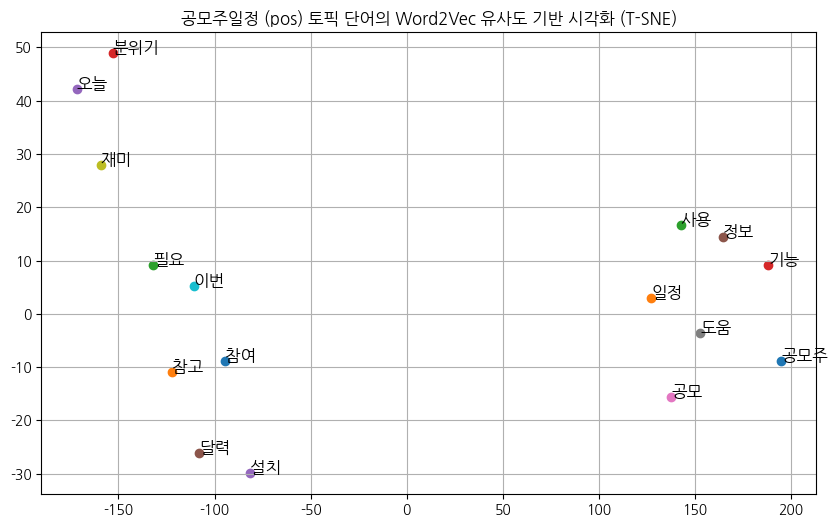

[공모주일정] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3974
토픽수: 3, Coherence Score: 0.2794
토픽수: 4, Coherence Score: 0.4786
토픽수: 5, Coherence Score: 0.5150
토픽수: 6, Coherence Score: 0.4511
토픽수: 7, Coherence Score: 0.4804
토픽수: 8, Coherence Score: 0.4766
최적 토픽수: 5 (Score: 0.5150)
[공모주일정 (neg) 토픽별 상위 단어 (k=5)
Topic #0: ['광고']
Topic #1: ['광고']
Topic #2: ['광고']
Topic #3: ['광고']
Topic #4: ['광고']
토픽 단어 총 1개
word2vec에 포함된 토픽 단어 수: 1개
perplexity (2) must be less than n_samples (1)
[공모러] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3563
토픽수: 3, Coherence Score: 0.3786
토픽수: 4, Coherence Score: 0.3830
토픽수: 5, Coherence Score: 0.3936
토픽수: 6, Coherence Score: 0.3943
토픽수: 7, Coherence Score: 0.4357
토픽수: 8, Coherence Score: 0.3674
최적 토픽수: 7 (Score: 0.4357)
[공모러 (pos) 토픽별 상위 단어 (k=7)
Topic #0: ['편리', '최고', '유용', '정보', '공모주', '상장', '관리', '일정', '표시', '청약']
Topic #1: ['편리', '표시', '사용', '계산', '청약', '상장', '관리', '수익', '일정', '공모주']
Topic #2: ['일정', '청약', '표시', '계산', '기능', '유용', '감사', '상장', '수익', '사용']
Topic #3: ['청약', '상장', '최고', '사용', '일정', '표시', '기능', '공모주', '관리', '편리']
Topic #4: ['정보', '수익', '청약', '편리', '관리', '공모주', '기능', '필요', '계산', '최고']
Topic #5: ['수익', '관리', '청약', '사용', '기능', '유용', '표시', '필요', '공모', '정보']
Topic #6: ['수익', '표시', '청약', '관리', '사용', '필요', '기능', '일정', '공모주', '감사']
토픽 단어 총 17개
word2vec에 포함된 토픽 단어 수: 17개


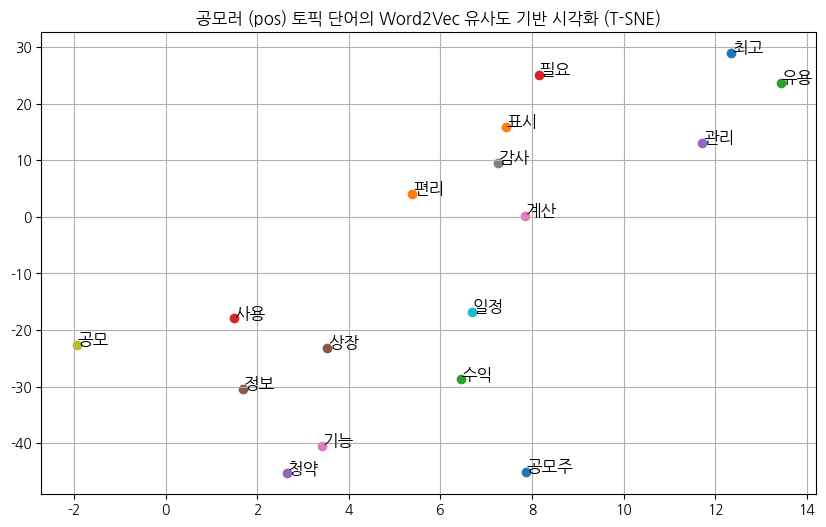

[공모러] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5437
토픽수: 3, Coherence Score: 0.7358
토픽수: 4, Coherence Score: 0.6564
토픽수: 5, Coherence Score: 0.8035
토픽수: 6, Coherence Score: 0.7392
토픽수: 7, Coherence Score: 0.7084
토픽수: 8, Coherence Score: 0.7320
최적 토픽수: 5 (Score: 0.8035)
After pruning, no terms remain. Try a lower min_df or a higher max_df.
[피너츠] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3384
토픽수: 3, Coherence Score: 0.4151
토픽수: 4, Coherence Score: 0.3867
토픽수: 5, Coherence Score: 0.3460
토픽수: 6, Coherence Score: 0.3882
토픽수: 7, Coherence Score: 0.5359
토픽수: 8, Coherence Score: 0.4334
최적 토픽수: 7 (Score: 0.5359)
[피너츠 (pos) 토픽별 상위 단어 (k=7)
Topic #0: ['일정', '경쟁', '확인', '금액', '감사', '편리', '정보', '핸드폰', '공모주', '사용']
Topic #1: ['감사', '확인', '금액', '정보', '편리', '사용', '일정', '공모주', '경쟁', '핸드폰']
Topic #2: ['사용', '핸드폰', '감사', '일정', '경쟁', '금액', '정보', '확인', '편리', '공모주']
Topic #3: ['감사', '확인', '사용', '금액', '정보', '편리', '경쟁', '일정', '공모주', '최고']
Topic #4: ['정보', '핸드폰', '편리', '최고', '감사', '금액', '공모주', '확인', '경쟁', '일정']
Topic #5: ['핸드폰', '정보', '편리', '일정', '경쟁', '금액', '공모주', '사용', '확인', '감사']
Topic #6: ['핸드폰', '확인', '일정', '감사', '공모주', '경쟁', '사용', '금액', '정보', '편리']
토픽 단어 총 11개
word2vec에 포함된 토픽 단어 수: 11개


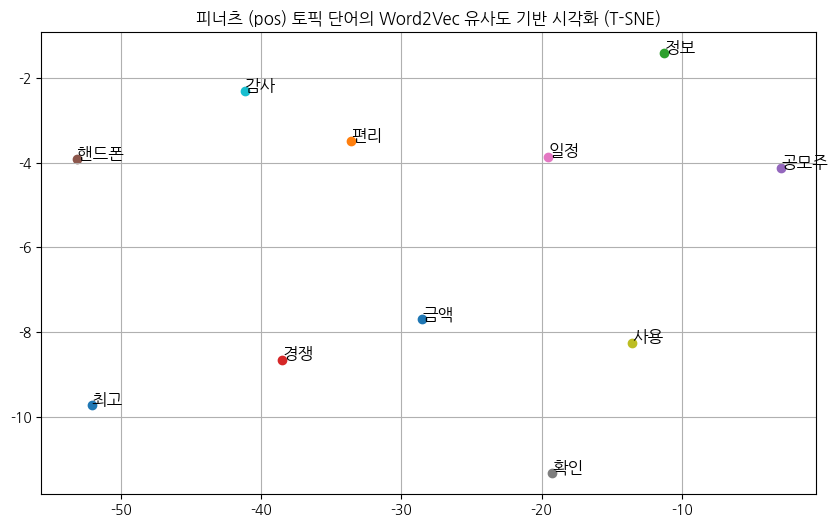

[피너츠] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4351
토픽수: 3, Coherence Score: 0.2992
토픽수: 4, Coherence Score: 0.2921
토픽수: 5, Coherence Score: 0.4976
토픽수: 6, Coherence Score: 0.5222
토픽수: 7, Coherence Score: 0.6499
토픽수: 8, Coherence Score: 0.5004
최적 토픽수: 7 (Score: 0.6499)
After pruning, no terms remain. Try a lower min_df or a higher max_df.
[일육공] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4789
토픽수: 3, Coherence Score: 0.4110
토픽수: 4, Coherence Score: 0.3554
토픽수: 5, Coherence Score: 0.4479
토픽수: 6, Coherence Score: 0.5155
토픽수: 7, Coherence Score: 0.4156
토픽수: 8, Coherence Score: 0.4149
최적 토픽수: 6 (Score: 0.5155)
[일육공 (pos) 토픽별 상위 단어 (k=6)
Topic #0: ['청약', '감사', '사용', '정보', '투자', '공모주', '확인', '편리', '일정', '점수']
Topic #1: ['일정', '확인', '점수', '청약', '투자', '공모주', '사용', '감사', '정보', '편리']
Topic #2: ['투자', '점수', '일정', '수익', '사용', '청약', '정보', '공모주', '매력', '지수']
Topic #3: ['일정', '청약', '점수', '수익', '감사', '확인', '사용', '정보', '투자', '공모주']
Topic #4: ['확인', '청약', '투자', '편리', '점수', '수익', '공모주', '정보', '감사', '사용']
Topic #5: ['감사', '정보', '공모주', '확인', '지수', '매력', '사용', '투자', '청약', '수익']
토픽 단어 총 13개
word2vec에 포함된 토픽 단어 수: 13개


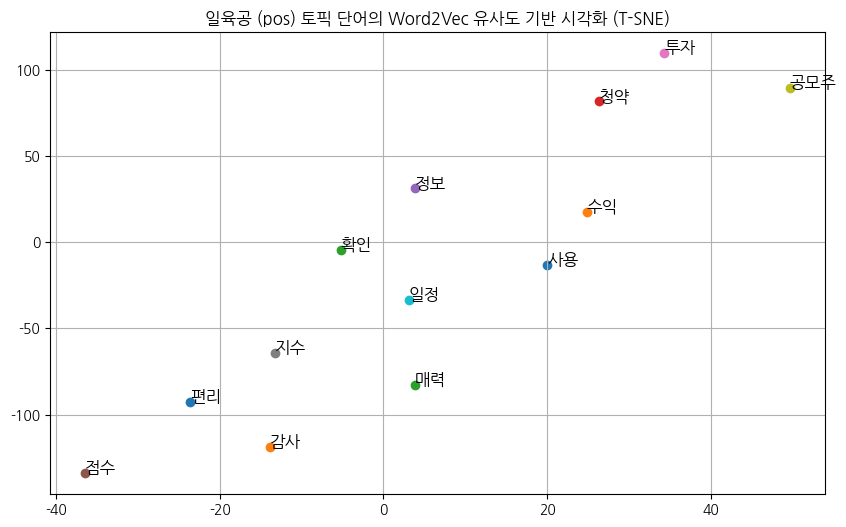

[일육공] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4207
토픽수: 3, Coherence Score: 0.3784
토픽수: 4, Coherence Score: 0.3768
토픽수: 5, Coherence Score: 0.3750
토픽수: 6, Coherence Score: 0.3432
토픽수: 7, Coherence Score: 0.4032
토픽수: 8, Coherence Score: 0.3670
최적 토픽수: 2 (Score: 0.4207)
[일육공 (neg) 토픽별 상위 단어 (k=2)
Topic #0: ['개선', '불가', '비번', '이후', '로딩', '무한', '계좌', '업데이트', '화면', '가입']
Topic #1: ['이후', '비번', '불가', '개선', '입력', '공모주', '노트', '설치', '사용', '투자']
토픽 단어 총 16개
word2vec에 포함된 토픽 단어 수: 16개


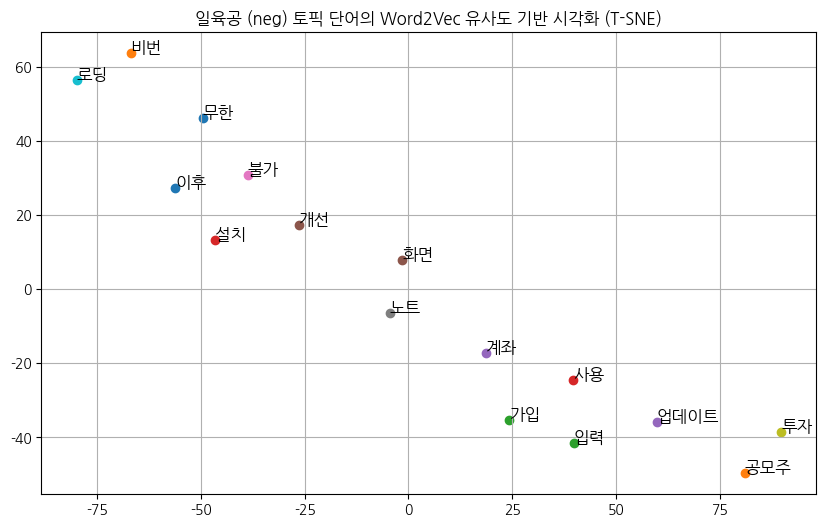

[공모주알리미] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4591
토픽수: 3, Coherence Score: 0.5880
토픽수: 4, Coherence Score: 0.4334
토픽수: 5, Coherence Score: 0.4786
토픽수: 6, Coherence Score: 0.4091
토픽수: 7, Coherence Score: 0.5073
토픽수: 8, Coherence Score: 0.4547
최적 토픽수: 3 (Score: 0.5880)
[공모주알리미 (pos) 토픽별 상위 단어 (k=3)
Topic #0: ['일정', '확인', '이용', '편리', '실시간', '추천', '알리', '청약', '정보', '공모주']
Topic #1: ['공모주', '유용', '실시간', '편리', '확인', '기업', '일정', '종목', '사용', '청약']
Topic #2: ['공모주', '관심', '투자', '청약', '확인', '덕분', '도움', '일정', '기능', '정보']
토픽 단어 총 19개
word2vec에 포함된 토픽 단어 수: 19개


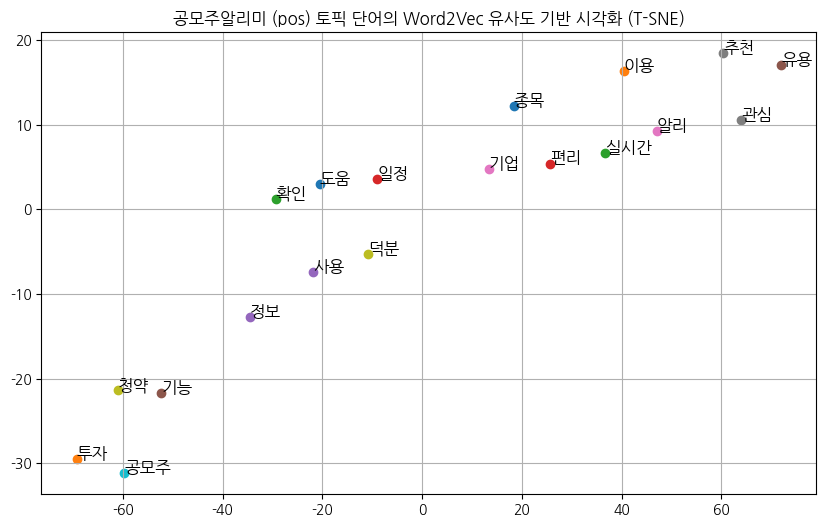

[공모주알리미] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5642
토픽수: 3, Coherence Score: 0.4190
토픽수: 4, Coherence Score: 0.3464
토픽수: 5, Coherence Score: 0.3028
토픽수: 6, Coherence Score: 0.2737
토픽수: 7, Coherence Score: 0.3826
토픽수: 8, Coherence Score: 0.3735
최적 토픽수: 2 (Score: 0.5642)
max_df corresponds to < documents than min_df


In [52]:
# Word2Vec 학습 train_df 전체 단어에 대해서 학습
w2v_model = None
all_reviews = train_df['사용자 리뷰'].dropna().tolist()
all_tokenized = tokenize_texts(all_reviews)
w2v_model = Word2Vec(sentences=all_tokenized, vector_size=100, window=5, min_count=2, workers=4, sg=1)

for ipo_eng, pn in pos_neg_dict.items():
    for senti, df_senti in pn.items():
        text_series = df_senti['사용자 리뷰'].dropna()
        if len(text_series) < 1:
            print(f"{ipo_eng} ({senti}) 리뷰 수 부족 ({len(text_series)}개) - 스킵")
            continue
        texts = text_series.tolist()
        
        # 최적 토픽 수 탐색
        try:
            print(f"[{ipo_eng}] ({senti}) 최적 토픽 수 계산 중...")
            best_k = find_optimal_topics(texts)
        except:
            print(f"[{ipo_eng} ({senti}) 최적 토픽 수 계산 오류")
            continue
            
        # LDA용 토큰화
        tokenized_texts = tokenize_texts(texts)
        
        # CountVectorizer
        try:
            vectorizer = CountVectorizer(tokenizer=lambda x: x, token_pattern=None, lowercase=False, max_df=0.9, min_df=5)
            review_vec = vectorizer.fit_transform(tokenized_texts)
            
            if review_vec.shape[1] == 0:
                print(f"[{ipo_eng} ({senti}) min_df 조건 만족 단어 없음 - 스킵")
                continue
                
            # LDA 학습
            lda_model = LatentDirichletAllocation(n_components=best_k, random_state=42)
            lda_model.fit(review_vec)
            
            words = vectorizer.get_feature_names_out()
            
            # 토픽별 상위 단어 출력 + 전체 단어 set에 모으기
            all_topic_words = set()
            print(f"[{ipo_eng} ({senti}) 토픽별 상위 단어 (k={best_k})")
            print("=" * 60)
            for i, topic in enumerate(lda_model.components_):
                top = [words[idx] for idx in topic.argsort()[-10:]]
                print(f"Topic #{i}: {top}")
                all_topic_words.update(top)
            
            print(f"토픽 단어 총 {len(all_topic_words)}개")
            
            # 토픽 단어 중 word2vec에 있는 것만 사용해서 시각화
            valid_words = [word for word in all_topic_words if word in w2v_model.wv]
            print(f"word2vec에 포함된 토픽 단어 수: {len(valid_words)}개")
            
            vectors = np.array([w2v_model.wv[word] for word in valid_words])
            
            tsne_perplexity = min(5, len(valid_words) -1)
            if tsne_perplexity < 2:
                tsne_perplexity = 2
            
            tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity)
            reduced_vecs = tsne.fit_transform(vectors)
            
            # tsne 시각화
            
            plt.figure(figsize=(10, 6))
            for i, word in enumerate(valid_words):
                x, y = reduced_vecs[i]
                plt.scatter(x, y)
                plt.text(x + 0.01, y +0.01, word, fontsize=12)
            plt.title(f"{ipo_eng} ({senti}) 토픽 단어의 Word2Vec 유사도 기반 시각화 (T-SNE)")
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(e)
            
            

#  TensorBoard Embedding Projector 포함 + 2D t-SNE

In [43]:
# pip install tensorflow

--- 토픽 모델링 시작 ---
✅ Word2Vec 학습 완료. 전체 리뷰 수: 450

[공모주일정] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4217
토픽수: 3, Coherence Score: 0.3693
토픽수: 4, Coherence Score: 0.4636
토픽수: 5, Coherence Score: 0.4640
토픽수: 6, Coherence Score: 0.4092
토픽수: 7, Coherence Score: 0.3797
토픽수: 8, Coherence Score: 0.4199
최적 토픽수: 5 (Score: 0.4640)

[공모주일정] (pos) 토픽별 상위 단어 (K=5)
------------------------------------------------------------
Topic #0: ['이번', '일정', '분위기', '공모', '공모주', '오늘', '기능', '정보', '도움', '재미']
Topic #1: ['재미', '달력', '사용', '필요', '공모주', '참여', '오늘', '이번', '참고', '공모']
Topic #2: ['재미', '설치', '참고', '기능', '필요', '달력', '이번', '참여', '공모주', '일정']
Topic #3: ['공모', '일정', '도움', '달력', '정보', '이번', '필요', '설치', '사용', '공모주']
Topic #4: ['재미', '설치', '정보', '사용', '달력', '참여', '오늘', '일정', '분위기', '공모주']
   ▶ 토픽 단어 총 50개
   ▶ Word2Vec에 포함된 토픽 단어 수: 50개
   ✅ TensorBoard Embedding Projector 로그 생성: /mnt/c/fintech3/공모주앱리뷰/tensorboard_logs/embedding_공모주일정_pos
   ▶ t-SNE perplexity = 5


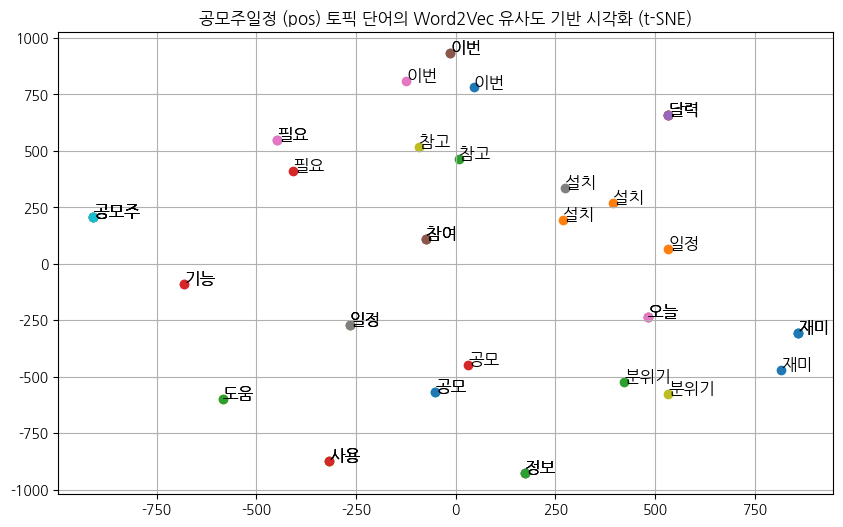


[공모주일정] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3974
토픽수: 3, Coherence Score: 0.2794
토픽수: 4, Coherence Score: 0.4786
토픽수: 5, Coherence Score: 0.5150
토픽수: 6, Coherence Score: 0.4511
토픽수: 7, Coherence Score: 0.4804
토픽수: 8, Coherence Score: 0.4766
최적 토픽수: 5 (Score: 0.5150)

[공모주일정] (neg) 토픽별 상위 단어 (K=5)
------------------------------------------------------------
Topic #0: ['광고']
Topic #1: ['광고']
Topic #2: ['광고']
Topic #3: ['광고']
Topic #4: ['광고']
   ▶ 토픽 단어 총 5개
   ▶ Word2Vec에 포함된 토픽 단어 수: 5개
   ✅ TensorBoard Embedding Projector 로그 생성: /mnt/c/fintech3/공모주앱리뷰/tensorboard_logs/embedding_공모주일정_neg
   ▶ t-SNE perplexity = 4


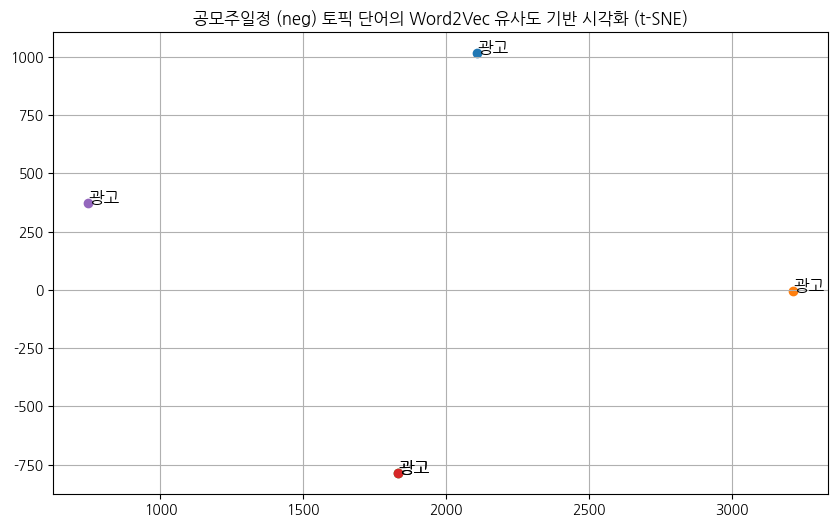


[공모러] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3563
토픽수: 3, Coherence Score: 0.3786
토픽수: 4, Coherence Score: 0.3830
토픽수: 5, Coherence Score: 0.3936
토픽수: 6, Coherence Score: 0.3943
토픽수: 7, Coherence Score: 0.4357
토픽수: 8, Coherence Score: 0.3674
최적 토픽수: 7 (Score: 0.4357)

[공모러] (pos) 토픽별 상위 단어 (K=7)
------------------------------------------------------------
Topic #0: ['편리', '최고', '유용', '정보', '공모주', '상장', '관리', '일정', '표시', '청약']
Topic #1: ['편리', '표시', '사용', '계산', '청약', '상장', '관리', '수익', '일정', '공모주']
Topic #2: ['일정', '청약', '표시', '계산', '기능', '유용', '감사', '상장', '수익', '사용']
Topic #3: ['청약', '상장', '최고', '사용', '일정', '표시', '기능', '공모주', '관리', '편리']
Topic #4: ['정보', '수익', '청약', '편리', '관리', '공모주', '기능', '필요', '계산', '최고']
Topic #5: ['수익', '관리', '청약', '사용', '기능', '유용', '표시', '필요', '공모', '정보']
Topic #6: ['수익', '표시', '청약', '관리', '사용', '필요', '기능', '일정', '공모주', '감사']
   ▶ 토픽 단어 총 70개
   ▶ Word2Vec에 포함된 토픽 단어 수: 70개
   ✅ TensorBoard Embedding Projector 로그 생성: /mnt/c/fintech3/공모주앱리뷰/tensorboard_logs/embedding_공모러_pos
   ▶ t-

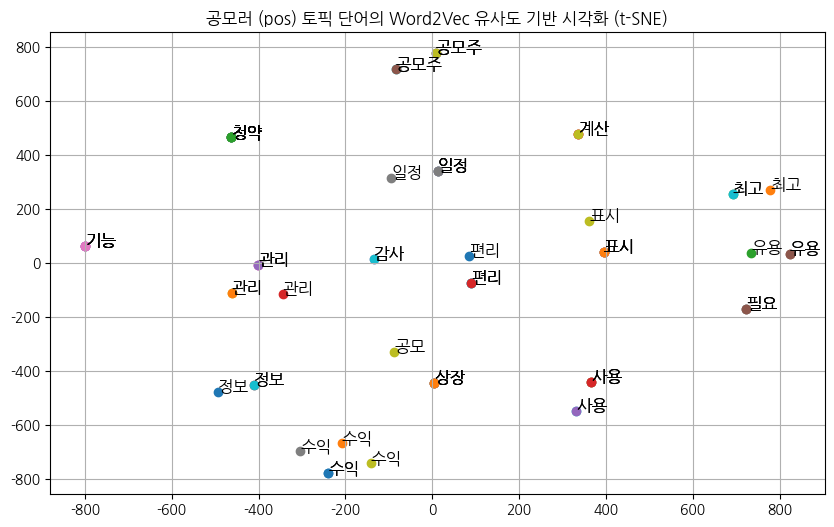


[공모러] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5437
토픽수: 3, Coherence Score: 0.7358
토픽수: 4, Coherence Score: 0.6564
토픽수: 5, Coherence Score: 0.8035
토픽수: 6, Coherence Score: 0.7392
토픽수: 7, Coherence Score: 0.7084
토픽수: 8, Coherence Score: 0.7320
최적 토픽수: 5 (Score: 0.8035)
공모러 (neg) LDA/Vectorizing 오류: After pruning, no terms remain. Try a lower min_df or a higher max_df.

[피너츠] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3384
토픽수: 3, Coherence Score: 0.4151
토픽수: 4, Coherence Score: 0.3867
토픽수: 5, Coherence Score: 0.3460
토픽수: 6, Coherence Score: 0.3882
토픽수: 7, Coherence Score: 0.5359
토픽수: 8, Coherence Score: 0.4334
최적 토픽수: 7 (Score: 0.5359)

[피너츠] (pos) 토픽별 상위 단어 (K=7)
------------------------------------------------------------
Topic #0: ['일정', '경쟁', '확인', '금액', '감사', '편리', '정보', '핸드폰', '공모주', '사용']
Topic #1: ['감사', '확인', '금액', '정보', '편리', '사용', '일정', '공모주', '경쟁', '핸드폰']
Topic #2: ['사용', '핸드폰', '감사', '일정', '경쟁', '금액', '정보', '확인', '편리', '공모주']
Topic #3: ['감사', '확인', '사용', '금액', '정보', '편리', '경쟁', '일정', '공모주', '최고']
Topic #4: ['정보', '핸드폰', '편리', '최고', '감사', '금액', '공모주', '확인', '경쟁', '일정']
Topic #5: ['핸드폰', '정보', '편리', '일정', '경쟁', '금액', '공모주', '사용', '확인', '감사']
Topic #6: ['핸드폰', '확인', '일정', '감사', '공모주', '경쟁', '사용', '금액', '정보', '편리']
   ▶ 토픽 단어 총 70개
   ▶ Word2Vec에 포함된 토픽 단어 수: 70개
   ✅ TensorBoard Embedding Projector 로그 생성: /mnt/c/fintech3/공모주앱리뷰/tensorboard_logs/embedding_피너츠_pos

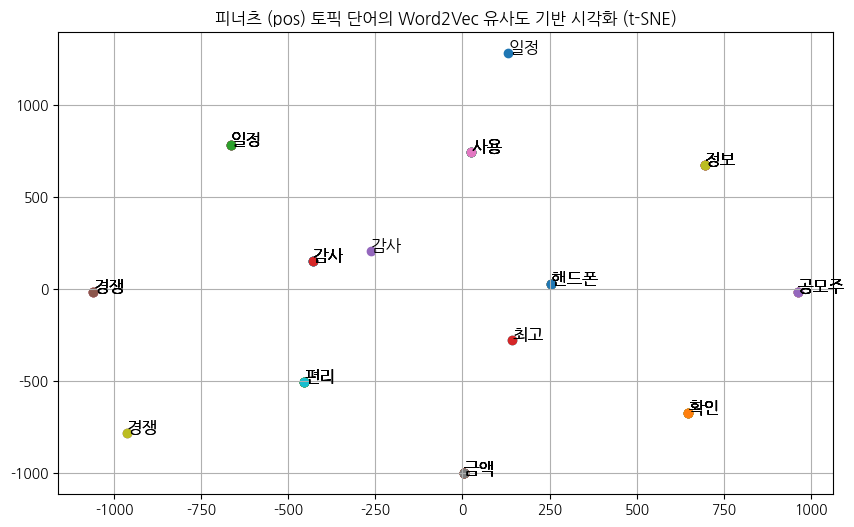


[피너츠] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4351
토픽수: 3, Coherence Score: 0.2992
토픽수: 4, Coherence Score: 0.2921
토픽수: 5, Coherence Score: 0.4976
토픽수: 6, Coherence Score: 0.5222
토픽수: 7, Coherence Score: 0.6499
토픽수: 8, Coherence Score: 0.5004
최적 토픽수: 7 (Score: 0.6499)
피너츠 (neg) LDA/Vectorizing 오류: After pruning, no terms remain. Try a lower min_df or a higher max_df.

[일육공] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4789
토픽수: 3, Coherence Score: 0.4110
토픽수: 4, Coherence Score: 0.3554
토픽수: 5, Coherence Score: 0.4479
토픽수: 6, Coherence Score: 0.5155
토픽수: 7, Coherence Score: 0.4156
토픽수: 8, Coherence Score: 0.4149
최적 토픽수: 6 (Score: 0.5155)

[일육공] (pos) 토픽별 상위 단어 (K=6)
------------------------------------------------------------
Topic #0: ['청약', '감사', '사용', '정보', '투자', '공모주', '확인', '편리', '일정', '점수']
Topic #1: ['일정', '확인', '점수', '청약', '투자', '공모주', '사용', '감사', '정보', '편리']
Topic #2: ['투자', '점수', '일정', '수익', '사용', '청약', '정보', '공모주', '매력', '지수']
Topic #3: ['일정', '청약', '점수', '수익', '감사', '확인', '사용', '정보', '투자', '공모주']
Topic #4: ['확인', '청약', '투자', '편리', '점수', '수익', '공모주', '정보', '감사', '사용']
Topic #5: ['감사', '정보', '공모주', '확인', '지수', '매력', '사용', '투자', '청약', '수익']
   ▶ 토픽 단어 총 60개
   ▶ Word2Vec에 포함된 토픽 단어 수: 60개
   ✅ TensorBoard Embedding Projector 로그 생성: /mnt/c/fintech3/공모주앱리뷰/tensorboard_logs/embedding_일육공_pos
   ▶ t-SNE perplexity = 5


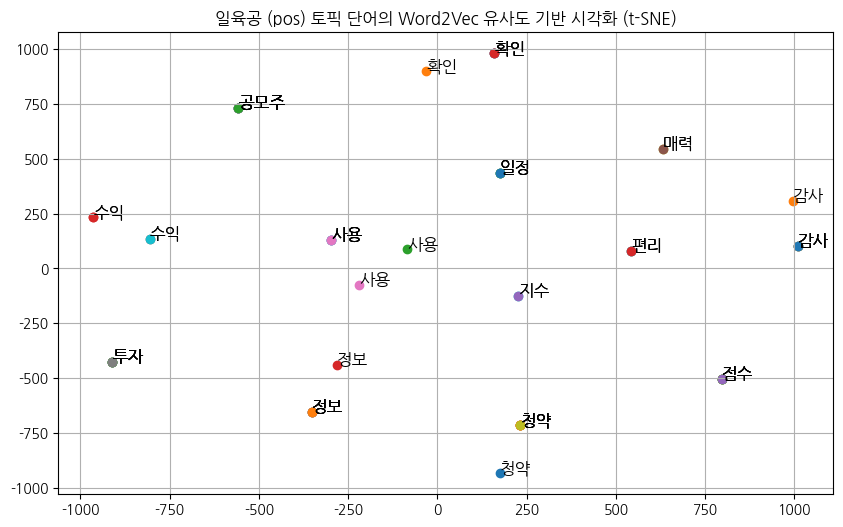


[일육공] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4207
토픽수: 3, Coherence Score: 0.3784
토픽수: 4, Coherence Score: 0.3768
토픽수: 5, Coherence Score: 0.3750
토픽수: 6, Coherence Score: 0.3432
토픽수: 7, Coherence Score: 0.4032
토픽수: 8, Coherence Score: 0.3670
최적 토픽수: 2 (Score: 0.4207)

[일육공] (neg) 토픽별 상위 단어 (K=2)
------------------------------------------------------------
Topic #0: ['개선', '불가', '비번', '이후', '로딩', '무한', '계좌', '업데이트', '화면', '가입']
Topic #1: ['이후', '비번', '불가', '개선', '입력', '공모주', '노트', '설치', '사용', '투자']
   ▶ 토픽 단어 총 20개
   ▶ Word2Vec에 포함된 토픽 단어 수: 20개
   ✅ TensorBoard Embedding Projector 로그 생성: /mnt/c/fintech3/공모주앱리뷰/tensorboard_logs/embedding_일육공_neg
   ▶ t-SNE perplexity = 5


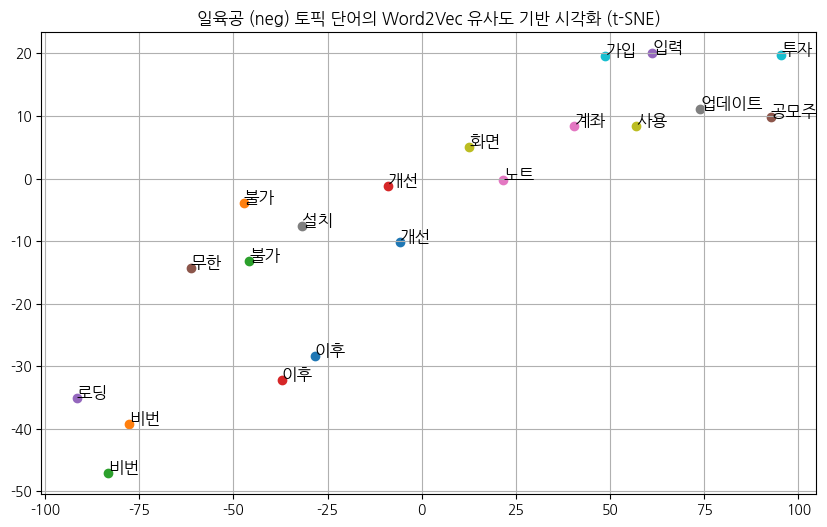


[공모주알리미] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4591
토픽수: 3, Coherence Score: 0.5880
토픽수: 4, Coherence Score: 0.4334
토픽수: 5, Coherence Score: 0.4786
토픽수: 6, Coherence Score: 0.4091
토픽수: 7, Coherence Score: 0.5073
토픽수: 8, Coherence Score: 0.4547
최적 토픽수: 3 (Score: 0.5880)

[공모주알리미] (pos) 토픽별 상위 단어 (K=3)
------------------------------------------------------------
Topic #0: ['일정', '확인', '이용', '편리', '실시간', '추천', '알리', '청약', '정보', '공모주']
Topic #1: ['공모주', '유용', '실시간', '편리', '확인', '기업', '일정', '종목', '사용', '청약']
Topic #2: ['공모주', '관심', '투자', '청약', '확인', '덕분', '도움', '일정', '기능', '정보']
   ▶ 토픽 단어 총 30개
   ▶ Word2Vec에 포함된 토픽 단어 수: 30개
   ✅ TensorBoard Embedding Projector 로그 생성: /mnt/c/fintech3/공모주앱리뷰/tensorboard_logs/embedding_공모주알리미_pos
   ▶ t-SNE perplexity = 5


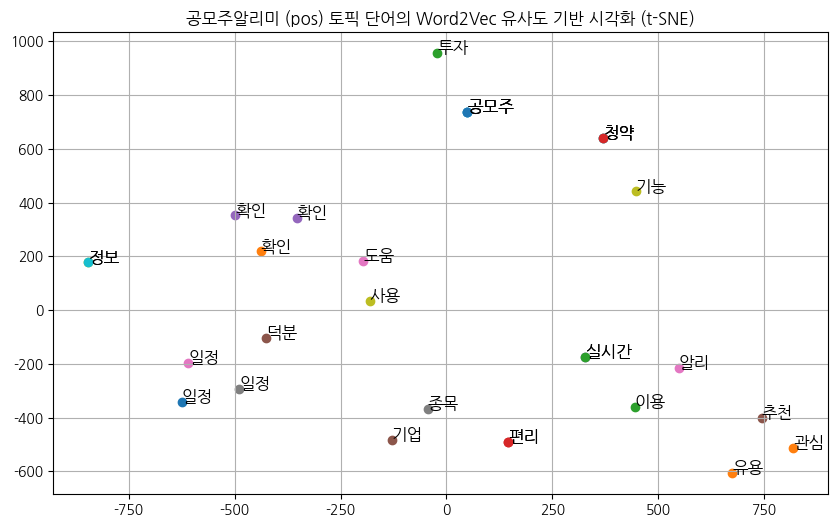


[공모주알리미] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5642
토픽수: 3, Coherence Score: 0.4190
토픽수: 4, Coherence Score: 0.3464
토픽수: 5, Coherence Score: 0.3028
토픽수: 6, Coherence Score: 0.2737
토픽수: 7, Coherence Score: 0.3826
토픽수: 8, Coherence Score: 0.3735
최적 토픽수: 2 (Score: 0.5642)
공모주알리미 (neg) LDA/Vectorizing 오류: max_df corresponds to < documents than min_df
--- 최적 토픽 수 탐색 및 모델링 종료 ---


In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from gensim.models import Word2Vec

import tensorflow as tf
from tensorboard.plugins import projector


def safe_name(s):
    """폴더/파일명에 쓸 수 있도록 문자열을 안전하게 변환"""
    return ''.join(c if c.isalnum() else '_' for c in str(s))


LOG_ROOT = os.path.join(os.getcwd(), "tensorboard_logs")
os.makedirs(LOG_ROOT, exist_ok=True)

print("--- 토픽 모델링 시작 ---")

# ==============================
# 1. Word2Vec 한 번만 학습
# ==============================
w2v_model = None
if 'train_df' in globals() and '사용자 리뷰' in train_df.columns:
    all_reviews = train_df['사용자 리뷰'].dropna().tolist()
    all_tokenized = tokenize_texts(all_reviews)
    w2v_model = Word2Vec(
        sentences=all_tokenized,
        vector_size=100,
        window=5,
        min_count=2,   # 단어 커버 늘리기
        workers=4,
        sg=1
    )
    print(f"✅ Word2Vec 학습 완료. 전체 리뷰 수: {len(all_reviews)}")
else:
    print("'train_df' 또는 '사용자 리뷰' 컬럼이 없어 Word2Vec 학습을 건너뜁니다.")


# ==============================
# 2. 은행 × 감성별 LDA + Word2Vec + TSNE + Embedding Projector
# ==============================
for ipo_eng, pn in pos_neg_dict.items():
    for senti, df_senti in pn.items():

        # 1) DataFrame 및 컬럼 체크
        if not hasattr(df_senti, "columns"):
            print(f"{ipo_eng} ({senti}) DataFrame 형식이 아님 - 스킵")
            continue

        if '사용자 리뷰' not in df_senti.columns:
            print(f"{ipo_eng} ({senti}) '사용자 리뷰' 컬럼 없음 - 스킵")
            continue

        # 2) NaN 제거
        texts_series = df_senti['사용자 리뷰'].dropna()

        # 3) 리뷰 수 체크
        if len(texts_series) < 1:
            print(f"{ipo_eng} ({senti}) 리뷰 수 부족 ({len(texts_series)}개) - 스킵")
            continue

        # 4) 문자열 리스트 준비
        texts = texts_series.tolist()

        # 5) 최적 토픽 수 탐색
        try:
            print(f"\n[{ipo_eng}] ({senti}) 최적 토픽 수 계산 중...")
            best_k = find_optimal_topics(texts)
        except Exception as e:
            print(f"{ipo_eng} ({senti}) 최적 토픽 수 계산 오류: {e}")
            continue

        # 6) LDA용 토큰화
        tokenized_texts = tokenize_texts(texts)

        try:
            # ==============================
            # 6-1. CountVectorizer + LDA
            # ==============================
            vectorizer = CountVectorizer(
                tokenizer=lambda x: x,  # 이미 토큰화된 리스트 사용
                token_pattern=None,
                lowercase=False,
                max_df=0.9,
                min_df=5
            )
            review_vec = vectorizer.fit_transform(tokenized_texts)

            # min_df 조건으로 인해 단어가 모두 필터링된 경우
            if review_vec.shape[1] == 0:
                print(f"{ipo_eng} ({senti}) min_df 조건 만족 단어 없음 - 스킵")
                continue

            lda_model = LatentDirichletAllocation(
                n_components=best_k,
                random_state=42
            )
            lda_model.fit(review_vec)

            words = vectorizer.get_feature_names_out()

            # ==============================
            # 6-2. 토픽별 상위 단어 + 토픽 ID 기록
            # ==============================
            topic_words = []  # 각 토픽에서 뽑은 상위 단어들 (중복 허용)
            topic_ids = []    # 각 단어가 속한 토픽 번호

            print(f"\n[{ipo_eng}] ({senti}) 토픽별 상위 단어 (K={best_k})")
            print("-" * 60)
            for t_idx, topic in enumerate(lda_model.components_):
                top_indices = topic.argsort()[-10:]  # 상위 10개 인덱스
                top = [words[idx] for idx in top_indices]
                print(f"Topic #{t_idx}: {top}")
                for w in top:
                    topic_words.append(w)
                    topic_ids.append(t_idx)

            print(f"   ▶ 토픽 단어 총 {len(topic_words)}개")

            # ==============================
            # 6-3. Word2Vec + TensorBoard + t-SNE
            # ==============================
            if w2v_model is None:
                print("   ⚠ w2v_model 이 없어 시각화를 건너뜁니다.")
                continue

            # Word2Vec에 존재하는 단어만 필터링 (토픽 ID와 함께)
            filtered_words = []
            filtered_topics = []
            vectors_list = []

            for w, t_id in zip(topic_words, topic_ids):
                if w in w2v_model.wv:
                    filtered_words.append(w)
                    filtered_topics.append(t_id)
                    vectors_list.append(w2v_model.wv[w])

            print(f"   ▶ Word2Vec에 포함된 토픽 단어 수: {len(filtered_words)}개")

            if len(filtered_words) < 3:
                print("   ⚠ Word2Vec 모델에 포함된 단어가 너무 적습니다 (3개 미만) - 시각화 스킵")
                continue

            vectors = np.array(vectors_list)

            # ---------- (A) TensorBoard Embedding Projector 설정 ----------
            log_dir = os.path.join(
                LOG_ROOT,
                f"embedding_{safe_name(ipo_eng)}_{safe_name(senti)}"
            )
            os.makedirs(log_dir, exist_ok=True)

            # 텐서 변수 정의
            embedding_var = tf.Variable(vectors, name="word_embeddings")

            # 체크포인트 저장 (embedding.ckpt-00001 등으로 저장됨)
            checkpoint = tf.train.Checkpoint(embedding=embedding_var)
            checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

            # 메타데이터 (단어 라벨 + 토픽 ID) 저장
            metadata_path = os.path.join(log_dir, "metadata.tsv")
            with open(metadata_path, "w", encoding="utf-8") as f:
                f.write("word\tbank\tsentiment\ttopic\n")
                for w, t_id in zip(filtered_words, filtered_topics):
                    f.write(f"{w}\t{ipo_eng}\t{senti}\t{t_id}\n")

            # Projector 설정 파일 생성
            config = projector.ProjectorConfig()
            embedding = config.embeddings.add()

            # ✅ 체크포인트에 저장된 실제 텐서 이름과 맞춰준다
            embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"

            embedding.metadata_path = "metadata.tsv"  # log_dir 기준 경로

            # log_dir 경로를 직접 넘겨서 Projector 설정
            projector.visualize_embeddings(log_dir, config)

            print(f"   ✅ TensorBoard Embedding Projector 로그 생성: {log_dir}")
            # ---------------------------------------------------------

            # ---------- (B) t-SNE 2D 시각화 ----------
            tsne_perplexity = min(5, len(filtered_words) - 1)
            if tsne_perplexity < 2:
                tsne_perplexity = 2
            print(f"   ▶ t-SNE perplexity = {tsne_perplexity}")

            tsne = TSNE(
                n_components=2,
                random_state=0,
                perplexity=tsne_perplexity,
            )
            reduced_vecs = tsne.fit_transform(vectors)

            plt.figure(figsize=(10, 6))
            for i, word in enumerate(filtered_words):
                x, y = reduced_vecs[i]
                plt.scatter(x, y)
                plt.text(x + 0.01, y + 0.01, word, fontsize=12)

            plt.title(f"{ipo_eng} ({senti}) 토픽 단어의 Word2Vec 유사도 기반 시각화 (t-SNE)")
            plt.grid(True)
            plt.show()
            # ---------------------------------------------------------

        except ValueError as e:
            print(f"{ipo_eng} ({senti}) LDA/Vectorizing 오류: {e}")
        except Exception as e:
            print(f"{ipo_eng} ({senti}) 예기치 못한 오류: {e}")

print("--- 최적 토픽 수 탐색 및 모델링 종료 ---")


In [45]:
#tenforboard 매직 명령어
%load_ext tensorboard

# 각 은행의 로그 디렉토리 지정해서 실행
%tensorboard --logdir ./tensorboard_logs/embedding_toss_neg

* Projector 탭 이동: 우측 상단의 탭에서 **'Projector'**를 선택합니다.
* 시각화 확인:
  * 데이터가 로드되면 3D 공간에 단어들이 점으로 표시됩니다.
  * 왼쪽 패널에서 'Run' 드롭다운을 열어 shinhan, woori 등 분석한 은행별 데이터를 선택할 수 있습니다.
  * 왼쪽 'Dimensions'에서 t-SNE를 선택하고, 3D로 설정합니다.
  * 이제 마우스로 3D 공간을 돌려보거나 확대/축소하며 단어들의 군집을 인터랙티브하게 탐색할 수 있습니다.